In [1]:
import eventDrivenSimulation as eds
import simpy
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import show as sh
import requests
import folium
import haversine
import math
import bibliothek as bib
import random
import simulation as sm
import statistics
from tabulate import tabulate

#### Load the data

In [2]:
#scheduling='pf-resback'
scheduling='pf'
#scheduling='10UEs'
#cluster=[]

file7='PRB_Simulation_133_320/prb_range.npy'
file8='PRB_Simulation_133_320/mu_range.npy'
file9='PRB_Simulation_133_320/prb_number_mode12.npy'
if(scheduling=='pf_2'):
    file1='PRB_Simulation_133_320_2/mean_rate_Gain_pf.npy'
    file2='PRB_Simulation_133_320_2/fainress_noCoMP_pf.npy'
    file3='PRB_Simulation_133_320_2/fainress_CoMP_pf.npy'
    file4='PRB_Simulation_133_320_2/Gain_std_max_min_10_90_pf.npy'
    file5='PRB_Simulation_133_320_2/stat_pf.npy'
    file6='PRB_Simulation_133_320_2/results_pf.npy'
    file8='PRB_Simulation_133_320_2/mu_range.npy'
    col='dodgerblue'
    
elif(scheduling=='pf'):
    file1='PRB_Simulation_133_320/mean_rate_Gain_pf.npy'
    file2='PRB_Simulation_133_320/fainress_noCoMP_pf.npy'
    file3='PRB_Simulation_133_320/fainress_CoMP_pf.npy'
    file4='PRB_Simulation_133_320/Gain_std_max_min_10_90_pf.npy'
    file5='PRB_Simulation_133_320/stat_pf.npy'
    file6='PRB_Simulation_133_320/results_pf2.npy'
    col='dodgerblue'
elif(scheduling=='sR'):
    file1='PRB_Simulation_133_320/mean_rate_Gain_sR.npy'
    file2='PRB_Simulation_133_320/fainress_noCoMP_sR.npy'
    file3='PRB_Simulation_133_320/fainress_CoMP_sR.npy'
    file4='PRB_Simulation_133_320/Gain_std_max_min_10_90_sR.npy'
    file5='PRB_Simulation_133_320/stat_sR.npy'
    file6='PRB_Simulation_133_320/results_sR.npy'
    col='#FF6103'
    
elif(scheduling=='rr'):
    file1='PRB_Simulation_133_320/mean_rate_Gain_rr.npy'
    file2='PRB_Simulation_133_320/fainress_noCoMP_rr.npy'
    file3='PRB_Simulation_133_320/fainress_CoMP_rr.npy'
    file4='PRB_Simulation_133_320/Gain_std_max_min_10_90_rr.npy'
    file5='PRB_Simulation_133_320/stat_rr.npy'
    file6='PRB_Simulation_133_320/results_rr.npy'
    col='green'
elif(scheduling =='pf-resback'):
    file1='PRB_Simulation_133_320/mean_rate_Gainpf_resback.npy'
    file2='PRB_Simulation_133_320/fainress_noCoMP_pf_resback.npy'
    file3='PRB_Simulation_133_320/fainress_CoMP_pf_resback.npy'
    file4='PRB_Simulation_133_320/Gain_std_max_min_10_90_pf_resback.npy'
    file5='PRB_Simulation_133_320/stat_pf_resback.npy'
    file6='PRB_Simulation_133_320/results_pf_resback.npy'
elif(scheduling=='10UEs'):
    file1='PRB_Simulation_133_320/10UEs/Gain_std_max_min_10_90_pf.npy'
    file2='PRB_Simulation_133_320/10UEs/fainress_noCoMP_pf.npy'
    file3='PRB_Simulation_133_320/10UEs/fainress_CoMP_pf.npy'
    file5='PRB_Simulation_133_320/10UEs/stat_pf.npy'
    file6='PRB_Simulation_133_320/10UEs/results_pf.npy'
else:
    print('x')




In [3]:
# Load
mean_rate_Gain = np.load(file1,allow_pickle='TRUE').item()
fNocomp= np.load(file2,allow_pickle='TRUE').item()
fcomp= np.load(file3,allow_pickle='TRUE').item()
prb_range= np.load(file7,allow_pickle='TRUE')
mu_range= np.load(file8,allow_pickle='TRUE')
max_prb=50
prb_number_mode12=np.load(file9,allow_pickle='TRUE')
Gain_std_max_min_10_90=np.load(file4,allow_pickle='TRUE').item()
stat_dic=np.load(file5,allow_pickle='TRUE').item()
results=np.load(file6,allow_pickle='TRUE').item()

### Evaluate the data

In [4]:
prb_range=prb_range[0:-10]

In [5]:
#prbs that are analyzed
prb_ana=[29,19]

In [6]:
if scheduling=='10UEs':
    mu_range=mu_range[0:14]
    prb_ana=[31,19]

#### Calculate the load of the system for different arrival rates (load gives the percentage of packets that can be served)

In [7]:
load=np.array([])
for j in mu_range:
    load=np.append(load,results[19][j]['load'])

In [10]:
load-30

array([ 4.9052e+04,  1.7180e+04,  8.6930e+03,  4.7860e+03,  2.3300e+03,
        1.3480e+03,  5.2300e+02,  2.2600e+02,  8.5000e+01,  9.0000e+00,
       -2.4000e+01, -2.9000e+01, -2.9000e+01, -2.9000e+01, -2.8000e+01,
       -3.0000e+01, -2.7000e+01, -2.8000e+01, -2.9000e+01])

In [11]:
mode='subtract'
if(mode=='subtract'):
    if(scheduling=='pf'):
        k=1
        load_list=np.array([])
        load_dic={}
        full_load=0
        load_list=load-30
        k=0
        for i in load_list:
            if(i>0):
                full_load=k-1
                print(k-1)
                break
            k+=1
    elif(scheduling=='pf'or scheduling=='pf-resback'):
        k=1
        load_list=np.array([])
        load_dic={}
        full_load=0
        load_list=load-30
        k=0
        for i in load_list:
            if(i<0):
                full_load=k-1
                print(k-1)
                break
            k+=1
else:
    if(scheduling=='pf_2'):
        k=1
        load_list=np.array([])
        load_dic={}
        full_load=0
        for i in load:
            load_per_UE_and_TTI=i/(30*2000)
            f=(1/mu_range[k-1])
            #save=f/load_per_UE_and_TTI
            save=1-(i/(2000*30))/(1/mu_range[k-1])
            load_list=np.append(load_list,save)
            load_dic.update({k:save})
            if(save<0.99):
                full_load=k-1
                print(save)
                print(k-1)
                break
            k=k+1
    if(scheduling=='pf'):
        k=1
        load_list=np.array([])
        load_dic={}
        full_load=0
        for i in load[0:19]:
            save=1-i/(2000*30/k)
            load_list=np.append(load_list,save)
            load_dic.update({k:save})
            if(save>0.99):
                full_load=k
                print(save)
                print(k)
                break
            k=k+1

-1


In [10]:
load_list=np.array([])
k=1
for i in load:
    save=1-i/(4000*30/(mu_range[k-1]))
    load_list=np.append(load_list,save)
    load_dic.update({k:save})
    k+=1

### Create Tables for side info

In [11]:
red_dic={}
red_stat={}
for i in prb_ana:
    red_dic_saver={}
    red_stat_saver={}
    x=Gain_std_max_min_10_90[i].copy()
    y=stat_dic[i]
    for j in mu_range:
        if(j<=20):
            red_dic_saver.update({j:x[j]})
            red_stat_saver.update({j:y[j]})
    red_dic.update({i:red_dic_saver})
    red_stat.update({i:red_stat_saver})

In [12]:
red_dic_19=red_dic[prb_ana[0]]
red_dic_29=red_dic[prb_ana[1]]
red_stat_19=red_stat[prb_ana[0]]
red_stat_29=red_stat[prb_ana[1]]
for i in red_dic_29:
    red_dic_19[i]=tuple(np.round(red_dic_19[i],2))
    red_stat_19[i]=tuple(np.round(red_stat_19[i],2))
for i in red_dic_29:
    red_dic_29[i]=tuple(np.round(red_dic_29[i],2))
    red_stat_29[i]=tuple(np.round(red_stat_29[i],2))

In [13]:
from tabulate import tabulate
headers = ["mu","mean","max_c","min_c","max_nc","min_nc", "max_gain", "min_gain","comp-max","comp-min"]
#print(tabulate([(k,) + v for k, v in red_dic_19.items()], headers=headers))
#print()
#print(tabulate([(k,) + v for k, v in red_dic_29.items()], headers=headers))

In [14]:
#print(tabulate([(k,) + v for k, v in red_dic_19.items()], headers=headers,tablefmt='latex'))

In [15]:
from tabulate import tabulate
headers = ["std","10% Quantil","90% Quantil"]
#print(tabulate([(k,) + v for k, v in red_stat_19.items()], headers=headers))
#print()
#print(tabulate([(k,) + v for k, v in red_stat_29.items()], headers=headers))

In [16]:
#print(tabulate([(k,) + v for k, v in red_stat_19.items()], headers=headers,tablefmt='latex'))

### Restuls

In [17]:
min_rates_dic={}
min_r=np.array([])
for j in prb_range:
    dict_saver={}
    for i in mu_range:
        min_r=np.array([])
        x=results[j][i]['m1']
        x2=results[j][i]['m2']
        min_r=np.append(min_r,np.min(x))
        min_r=np.append(min_r,np.min(x2))
        dict_saver.update({i:min_r})
    min_rates_dic.update({j:dict_saver})

In [18]:
mean_gain={}
min_rate_c={}
min_rate_nc={}
mean_rate_c={}
mean_rate_nc={}
for j in prb_range:
    mean=np.array([])
    min_nc=np.array([])
    min_c=np.array([])
    mean_nc=np.array([])
    mean_c=np.array([])    
    for i in mu_range:
        mean=np.append(mean,np.mean((results[j][i]['gain'])))
        min_c=np.append(min_c,np.min(results[j][i]['m2']))
        min_nc=np.append(min_nc,np.min(results[j][i]['m1']))
        mean_c=np.append(mean_c,np.mean(results[j][i]['m2']))
        mean_nc=np.append(mean_nc,np.mean(results[j][i]['m1']))
    mean_gain.update({j:mean})
    min_rate_c.update({j:min_c})
    min_rate_nc.update({j:min_nc})
    mean_rate_c.update({j:mean_c})
    mean_rate_nc.update({j:mean_nc})

In [19]:

gain_133_1=np.array([])
gain_133_2=np.array([])
gain_320_1=np.array([])
gain_320_2=np.array([])
gain_comp_1=np.array([])
gain_comp_2=np.array([])
gain_spt_1=np.array([])
gain_spt_2=np.array([])


for i in mu_range:
    x=results[prb_ana[0]][i]['gain'][0:30]*results[prb_ana[0]][i]['comp'][0:30]
    x=x[x!=0]
    gain_comp_1=np.append(gain_comp_1,np.mean(x))
    
    x=results[prb_ana[1]][i]['gain'][0:30]*results[prb_ana[0]][i]['comp'][0:30]
    x=x[x!=0]
    gain_comp_2=np.append(gain_comp_2,np.mean(x))
    
    x=results[prb_ana[0]][i]['gain'][0:15]*(1-results[prb_ana[0]][i]['comp'][0:15])
    x=x[x!=0]
    gain_133_1=np.append(gain_133_1,np.mean(x))
    
    x=results[prb_ana[1]][i]['gain'][0:15]*(1-results[prb_ana[1]][i]['comp'][0:15])
    x=x[x!=0]
    gain_133_2=np.append(gain_133_2,np.mean(x))
    
    x=results[prb_ana[0]][i]['gain'][15:30]*(1-results[prb_ana[0]][i]['comp'][15:30])
    x=x[x!=0]
    gain_320_1=np.append(gain_320_1,np.mean(x))
    
    x=results[prb_ana[1]][i]['gain'][15:30]*(1-results[prb_ana[1]][i]['comp'][15:30])
    x=x[x!=0]
    gain_320_2=np.append(gain_320_2,np.mean(x))
    
    
    
    x=results[prb_ana[1]][i]['gain'][0:30]*(1-results[prb_ana[1]][i]['comp'][0:30])
    x=x[x!=0]
    gain_spt_2=np.append(gain_spt_2,np.mean(x))    
    
    x=results[prb_ana[0]][i]['gain'][0:30]*(1-results[prb_ana[0]][i]['comp'][0:30])
    x=x[x!=0]
    gain_spt_1=np.append(gain_spt_1,np.mean(x))    
    
    

In [20]:
mu_range2=1/mu_range*full_load

In [21]:
#beg=2
#end=19
#plt.plot(mu_range2[beg:end],gain_133_1[beg:end],color='grey',linestyle='dotted', label='SPT-UEs TP-1',linewidth=2)
#plt.plot(mu_range2[beg:end],gain_320_1[beg:end],color='grey',linestyle='dashed', label= 'SPT-UEs TP-2',linewidth=2)
#plt.plot(mu_range2[beg:end],gain_comp_1[beg:end],color='grey', label='MPT-UEs',linewidth=2)
#plt.plot(mu_range2[beg:end],mean_gain[prb_ana[0]][beg:end],color='black', label='All-UEs',linewidth=2)
#plt.vlines(x=mu_range2[full_load],ymin=-50, ymax=85,ls='-',label='load boundary',colors='green')

#plt.legend()
#plt.title('Rate-gain analysis '+ str(prb_ana[0]*2) + ' % of the resources for comp UEs', fontsize=14)
#plt.grid()
#plt.legend( prop={'size': 12})
#plt.xlim(40,mu_range2[3])
#plt.ylim(-35,40)
#plt.ylim(-35,35)#
#plt.xlim(0.6,3)
#plt.xlabel('load factor')

#plt.ylim(-40,60)
#plt.ylabel('av. rate-gain [%]')

Text(0, 0.5, 'rate gain [%]')

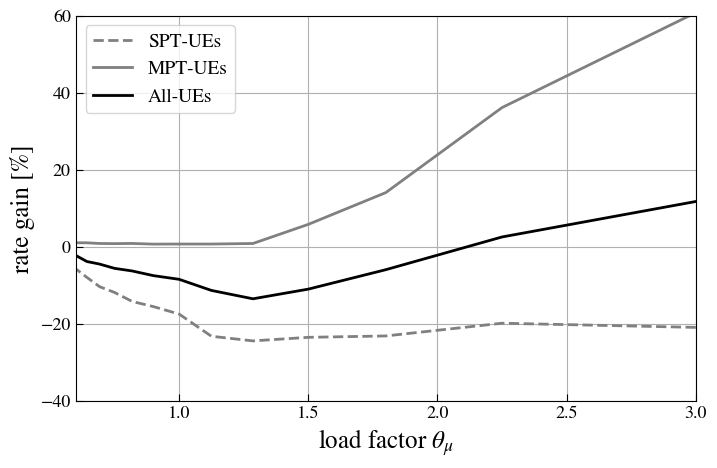

In [22]:
beg=2
end=19
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)
gain_spt=(gain_133_1[beg:end]+gain_320_1[beg:end])/2
#plt.plot(mu_range2[beg:end],gain_133_1[beg:end],color='grey',linestyle='dotted', label='SPT-UEs TP-1',linewidth=2)
plt.plot(mu_range2[beg:end],gain_spt_1[beg:end],color='grey',linestyle='dashed', label= 'SPT-UEs',linewidth=2)
plt.plot(mu_range2[beg:end],gain_comp_1[beg:end],color='grey', label='MPT-UEs',linewidth=2)
plt.plot(mu_range2[beg:end],mean_gain[prb_ana[0]][beg:end],color='black', label='All-UEs',linewidth=2)
#plt.vlines(x=mu_range2[full_load],ymin=-50, ymax=85,ls='-',label='load boundary',colors='green')

#plt.legend()
#plt.title('Rate-gain analysis '+ str(prb_ana[0]*2) + ' % of the resources for comp UEs', fontsize=14)
plt.grid()
plt.legend(prop={'size': 14})
#plt.xlabel('packet arrival rate $\mu$ [ms]')
plt.xlim(0.6,3)
#plt.ylim(-35,40)
#plt.ylim(-35,35)
plt.xlabel('load factor $\u03B8_{\mu}$',fontsize=18)
plt.ylim(-40,60)
plt.ylabel('rate gain [%]',fontsize=18)

Text(0, 0.5, 'rate gain [%]')

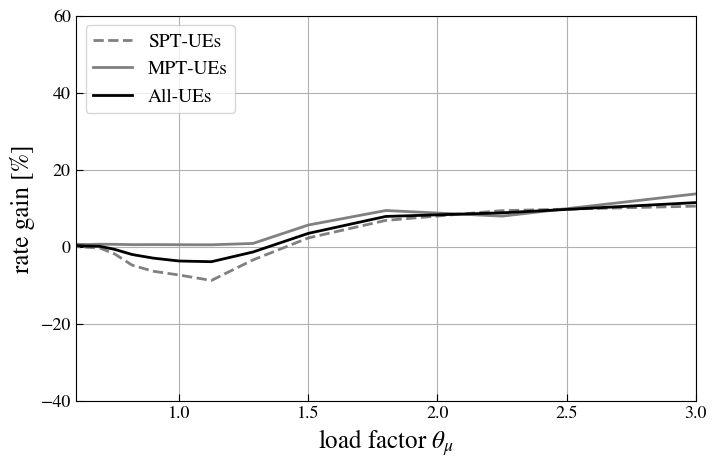

In [24]:
#plt.plot(mu_range,list(gain_133),color='#1f77b4', label='38 % TP-1')
#plt.plot(mu_range,list(gain_320),color='#1f77b4',linestyle='dashed', label='38 % TP-2')
#plt.plot(mu_range,list(gain_comp),color='#1f77b4',linestyle='dotted', label='38 % comp')

beg=2
end=19


f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
gain_spt2=(gain_133_2+gain_320_2)/2
#plt.plot(mu_range2[beg:end],list(gain_133_2)[beg:end],color='grey',linestyle='dotted',label='SPT-UEs TP-1',linewidth=2)
plt.plot(mu_range2[beg:end],gain_spt_2[beg:end],color='grey',linestyle='dashed', label='SPT-UEs',linewidth=2)
plt.plot(mu_range2[beg:end],list(gain_comp_2)[beg:end],color='grey', label='MPT-UEs',linewidth=2)
plt.plot(mu_range2[beg:end],list(mean_gain[prb_ana[1]])[beg:end],color='black', label='All-UEs',linewidth=2)
#plt.vlines(x=1/mu_range[full_load],ymin=-50, ymax=85,ls='-',label='load boundary',colors='green')
plt.xlim(0.6,3)
plt.ylim(-10,20)
#plt.legend()

plt.ylim(-40,60)
plt.grid()
#plt.title('Rate-gain analysis '+ str(prb_ana[1]*2) + ' % of the resources for comp UEs', fontsize=14)
plt.legend(loc='upper left', prop={'size': 14})
plt.xlabel('load factor $\u03B8_{\mu}$',fontsize=18)
plt.ylabel('rate gain [%]',fontsize=18)

In [29]:
dict_min_mean={}
min_list_c=np.array([])
mean_list_c=np.array([])

min_list_nc=np.array([])
mean_list_nc=np.array([])

nr=19
x=results[nr][1]['m1'][0:15]*(1-results[nr][9]['comp'][0:15])
x=x[x!=0]
print('TP1')
print('no comp ues:')
print('min:',np.min(x))
print('mean:',np.mean(x))
min_list_nc=np.append(min_list_nc,np.min(x))
mean_list_nc=np.append(mean_list_nc,np.mean(x))

x=results[nr][1]['m2'][0:15]*(1-results[nr][9]['comp'][0:15])
x=x[x!=0]
np.min(x)
print('comp ues:')
print('min:',np.min(x))
print('mean:',np.mean(x))
min_list_c=np.append(min_list_c,np.min(x))
mean_list_c=np.append(mean_list_c,np.mean(x))

x=results[nr][1]['m1'][15:30]*(1-results[19][9]['comp'][15:30])
x=x[x!=0]
np.min(x)
print('TP2')
print('no comp ues:')
print('min:',np.min(x))
print('mean:',np.mean(x))
min_list_nc=np.append(min_list_nc,np.min(x))
mean_list_nc=np.append(mean_list_nc,np.mean(x))

x=results[nr][1]['m2'][15:30]*(1-results[19][9]['comp'][15:30])
x=x[x!=0]
np.min(x)
print('comp ues:')
print('min:',np.min(x))
print('mean:',np.mean(x))
min_list_c=np.append(min_list_c,np.min(x))
mean_list_c=np.append(mean_list_c,np.mean(x))

x=results[nr][1]['m1']*(results[19][9]['comp'])
x=x[x!=0]
np.min(x)
print('Cell Edge')
print('no comp')
print('min:',np.min(x))
print('mean:',np.mean(x))
min_list_nc=np.append(min_list_nc,np.min(x))
mean_list_nc=np.append(mean_list_nc,np.mean(x))

x=results[nr][1]['m2']*(results[29][9]['comp'])
x=x[x!=0]
np.min(x)
print('comp')
print('min:',np.min(x))
print('mean:',np.mean(x))
min_list_c=np.append(min_list_c,np.min(x))
mean_list_c=np.append(mean_list_c,np.mean(x))

dict_min_mean['mean comp']= tuple(np.round(mean_list_c,1))
dict_min_mean['mean no comp']= tuple(np.round(mean_list_nc,1))
dict_min_mean['min comp']= tuple(np.round(min_list_c,1))
dict_min_mean['min no comp']= tuple(np.round(min_list_nc,1))

TP1
no comp ues:
min: 260.36397497417767
mean: 708.172344724587
comp ues:
min: 346.8916031178754
mean: 952.0410864892739
TP2
no comp ues:
min: 105.73757665292841
mean: 1172.8656715736463
comp ues:
min: 94.71669528942039
mean: 1048.0198491051697
Cell Edge
no comp
min: 385.67148195324864
mean: 860.9223078851346
comp
min: 530.129885264656
mean: 916.1417277527995


In [30]:
from tabulate import tabulate
headers = ["rate","TP1 central UEs","TP2 central UEs","Cell-edge UE"]
print(tabulate([(k,) + v for k, v in dict_min_mean.items()], headers=headers,tablefmt='latex'))

\begin{tabular}{lrrr}
\hline
 rate         &   TP1 central UEs &   TP2 central UEs &   Cell-edge UE \\
\hline
 mean comp    &             952   &            1048   &          916.1 \\
 mean no comp &             708.2 &            1172.9 &          860.9 \\
 min comp     &             346.9 &              94.7 &          530.1 \\
 min no comp  &             260.4 &             105.7 &          385.7 \\
\hline
\end{tabular}


In [53]:
dict_min_mean={}
q10_list_nc=np.array([])
q90_list_nc=np.array([])
mean_list_nc=np.array([])

mean_list_c=np.array([])
q10_list_c=np.array([])
q90_list_c=np.array([])


nr=19
mu=9
stp=results[nr][mu]['m1'][0:30]*(1-results[nr][mu]['comp'][0:30])
stp=stp[stp!=0]
q10_list_nc=np.append(q10_list_nc,np.quantile(stp,0.1))
q90_list_nc=np.append(q90_list_nc,np.quantile(stp,0.9))
mean_list_nc=np.append(mean_list_nc,np.mean(stp))

mtp=results[nr][mu]['m1'][0:30]*(results[nr][mu]['comp'][0:30])
mtp=mtp[mtp!=0]
q10_list_nc=np.append(q10_list_nc,np.quantile(mtp,0.1))
q90_list_nc=np.append(q90_list_nc,np.quantile(mtp,0.9))
mean_list_nc=np.append(mean_list_nc,np.mean(mtp))


stp_c=results[nr][mu]['m2'][0:30]*(1-results[nr][mu]['comp'][0:30])
stp_c=stp_c[stp_c!=0]
q10_list_c=np.append(q10_list_c,np.quantile(stp_c,0.1))
q90_list_c=np.append(q90_list_c,np.quantile(stp_c,0.9))
mean_list_c=np.append(mean_list_c,np.mean(stp_c))


stp_c=results[nr][mu]['m2'][0:30]*(results[nr][mu]['comp'][0:30])
stp_c=stp_c[stp_c!=0]
q10_list_c=np.append(q10_list_c,np.quantile(stp_c,0.1))
q90_list_c=np.append(q90_list_c,np.quantile(stp_c,0.9))
mean_list_c=np.append(mean_list_c,np.mean(stp_c))


dict_min_mean['mean comp']= tuple(np.round(mean_list_c,1))
dict_min_mean['mean no comp']= tuple(np.round(mean_list_nc,1))
dict_min_mean['10% Quantil comp']= tuple(np.round(q10_list_c,1))
dict_min_mean['10% Quantil no comp']= tuple(np.round(q10_list_nc,1))
dict_min_mean['90% Quantil comp']= tuple(np.round(q90_list_c,1))
dict_min_mean['90% Quantil no comp']= tuple(np.round(q90_list_nc,1))

In [54]:
from tabulate import tabulate
headers = ["rate","STP UEs","MTP UE"]
print(tabulate([(k,) + v for k, v in dict_min_mean.items()], headers=headers,tablefmt='latex'))

\begin{tabular}{lrr}
\hline
 rate                &   STP UEs &   MTP UE \\
\hline
 mean comp           &     416.6 &    464.5 \\
 mean no comp        &     440.2 &    462   \\
 10\% Quantil comp    &     281.9 &    428.1 \\
 10\% Quantil no comp &     361.8 &    425.3 \\
 90\% Quantil comp    &     490.3 &    511.8 \\
 90\% Quantil no comp &     492.4 &    510.1 \\
\hline
\end{tabular}


In [55]:
dict_min_mean={}
q10_list_nc=np.array([])
q90_list_nc=np.array([])
mean_list_nc=np.array([])

mean_list_c=np.array([])
q10_list_c=np.array([])
q90_list_c=np.array([])


nr=19
mu=3
stp=results[nr][mu]['m1'][0:30]*(1-results[nr][mu]['comp'][0:30])
stp=stp[stp!=0]
q10_list_nc=np.append(q10_list_nc,np.quantile(stp,0.1))
q90_list_nc=np.append(q90_list_nc,np.quantile(stp,0.9))
mean_list_nc=np.append(mean_list_nc,np.mean(stp))

mtp=results[nr][mu]['m1'][0:30]*(results[nr][mu]['comp'][0:30])
mtp=mtp[mtp!=0]
q10_list_nc=np.append(q10_list_nc,np.quantile(mtp,0.1))
q90_list_nc=np.append(q90_list_nc,np.quantile(mtp,0.9))
mean_list_nc=np.append(mean_list_nc,np.mean(mtp))


stp_c=results[nr][mu]['m2'][0:30]*(1-results[nr][mu]['comp'][0:30])
stp_c=stp_c[stp_c!=0]
q10_list_c=np.append(q10_list_c,np.quantile(stp_c,0.1))
q90_list_c=np.append(q90_list_c,np.quantile(stp_c,0.9))
mean_list_c=np.append(mean_list_c,np.mean(stp_c))


stp_c=results[nr][mu]['m2'][0:30]*(results[nr][mu]['comp'][0:30])
stp_c=stp_c[stp_c!=0]
q10_list_c=np.append(q10_list_c,np.quantile(stp_c,0.1))
q90_list_c=np.append(q90_list_c,np.quantile(stp_c,0.9))
mean_list_c=np.append(mean_list_c,np.mean(stp_c))


dict_min_mean['mean comp']= tuple(np.round(mean_list_c,1))
dict_min_mean['mean no comp']= tuple(np.round(mean_list_nc,1))
dict_min_mean['10% Quantil comp']= tuple(np.round(q10_list_c,1))
dict_min_mean['10% Quantil no comp']= tuple(np.round(q10_list_nc,1))
dict_min_mean['90% Quantil comp']= tuple(np.round(q90_list_c,1))
dict_min_mean['90% Quantil no comp']= tuple(np.round(q90_list_nc,1))

In [56]:
dict_min_mean={}
q10_list_nc=np.array([])
q90_list_nc=np.array([])
mean_list_nc=np.array([])

mean_list_c=np.array([])
q10_list_c=np.array([])
q90_list_c=np.array([])



stp_c=results[nr][1]['gain'][0:30]*(1-results[nr][1]['comp'][0:30])
stp_c=stp_c[stp_c!=0]
q10_list_c=np.append(q10_list_c,np.quantile(stp_c,0.1))
q90_list_c=np.append(q90_list_c,np.quantile(stp_c,0.9))
mean_list_c=np.append(mean_list_c,np.mean(stp_c))


stp_c=results[nr][1]['gain'][0:30]*(results[nr][1]['comp'][0:30])
stp_c=stp_c[stp_c!=0]
q10_list_c=np.append(q10_list_c,np.quantile(stp_c,0.1))
q90_list_c=np.append(q90_list_c,np.quantile(stp_c,0.9))
mean_list_c=np.append(mean_list_c,np.mean(stp_c))


dict_min_mean['mean comp']= tuple(np.round(mean_list_c,1))
dict_min_mean['10% Quantil comp']= tuple(np.round(q10_list_c,1))
dict_min_mean['90% Quantil comp']= tuple(np.round(q90_list_c,1))

In [57]:
from tabulate import tabulate
headers = ["rate","STP UEs","MTP UE"]
print(tabulate([(k,) + v for k, v in dict_min_mean.items()], headers=headers,tablefmt='latex'))

\begin{tabular}{lrr}
\hline
 rate             &   STP UEs &   MTP UE \\
\hline
 mean comp        &       6.9 &     18.4 \\
 10\% Quantil comp &     -11.2 &    -20.9 \\
 90\% Quantil comp &      34.9 &     71.1 \\
\hline
\end{tabular}


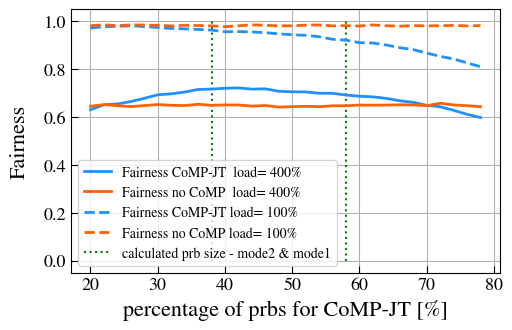

In [58]:
fsize = 15 # Allgemein
tsize = 18 # Legende

tdir = 'in'
major = 5.0 # Länge major ticks
minor = 3.0 # Länge minor ticks
lwidth = 0.8 # Dicke Rahmen
lhandle = 2.0 # Länge handle in Legende
plt.style.use('default')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

# Bildgroesse
fig_width_pt = 400  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches

no_c=np.array([])
c=np.array([])
for i in prb_range:
    c=np.append(c,fcomp[i][1])
    no_c=np.append(no_c,fNocomp[i][1])



plt.figure(figsize=(fig_width,fig_height)) 
parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)


count=0
plt.plot((prb_range[0:35]/50)*100,c[0:35],color='dodgerblue',label='Fairness CoMP-JT  load= 400%',linewidth=2)
plt.plot((prb_range[0:35]/50)*100,no_c[0:35],color='#FF6103',label='Fairness no CoMP  load= 400%',linewidth=2)

no_c=np.array([])
c=np.array([])
for i in prb_range:
    c=np.append(c,fcomp[i][7])
    no_c=np.append(no_c,fNocomp[i][7])

plt.plot((prb_range[0:35]/50)*100,c[0:35],color='dodgerblue',linestyle='--',label='Fairness CoMP-JT load= 100%',linewidth=2)
plt.plot((prb_range[0:35]/50)*100,no_c[0:35],color='#FF6103',linestyle='--',label='Fairness no CoMP load= 100%',linewidth=2)

#plt.legend()
plt.grid()
plt.xlabel('percentage of prbs for CoMP-JT [%]')
plt.ylabel('Fairness',labelpad = 10)
plt.vlines(x=58,ymin=0, ymax=1,ls=':',label='calculated prb size - mode2 & mode1',colors='green')
plt.vlines(x=38,ymin=0, ymax=1,ls=':',colors='green')
plt.legend(prop={'size': 10},loc='lower left')
#plt.xlim(0,1)
count+=1

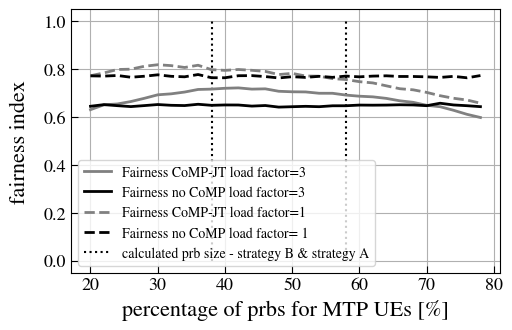

In [59]:
fsize = 15 # Allgemein
tsize = 18 # Legende

tdir = 'in'
major = 5.0 # Länge major ticks
minor = 3.0 # Länge minor ticks
lwidth = 0.8 # Dicke Rahmen
lhandle = 2.0 # Länge handle in Legende
plt.style.use('default')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

# Bildgroesse
fig_width_pt = 400  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches

no_c=np.array([])
c=np.array([])
for i in prb_range:
    c=np.append(c,fcomp[i][1])
    no_c=np.append(no_c,fNocomp[i][1])



plt.figure(figsize=(fig_width,fig_height)) 
parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)


count=0
plt.plot((prb_range[0:35]/50)*100,c[0:35],color='grey',label='Fairness CoMP-JT load factor=3',linewidth=2)
plt.plot((prb_range[0:35]/50)*100,no_c[0:35],color='black',label='Fairness no CoMP load factor=3',linewidth=2)

no_c=np.array([])
c=np.array([])
for i in prb_range:
    c=np.append(c,fcomp[i][2])
    no_c=np.append(no_c,fNocomp[i][2])

plt.plot((prb_range[0:35]/50)*100,c[0:35],color='grey',linestyle='--',label='Fairness CoMP-JT load factor=1',linewidth=2)
plt.plot((prb_range[0:35]/50)*100,no_c[0:35],color='black',linestyle='--',label='Fairness no CoMP load factor= 1',linewidth=2)

#plt.legend()
plt.grid()
plt.xlabel('percentage of prbs for MTP UEs [%]')
plt.ylabel('fairness index',labelpad = 10)
plt.vlines(x=58,ymin=0, ymax=1,ls=':',label='calculated prb size - strategy B & strategy A',colors='black')
plt.vlines(x=38,ymin=0, ymax=1,ls=':',colors='black')
plt.legend(prop={'size': 10},loc='lower left')
#plt.xlim(0,1)
count+=1

<Figure size 553.48x542.069 with 0 Axes>

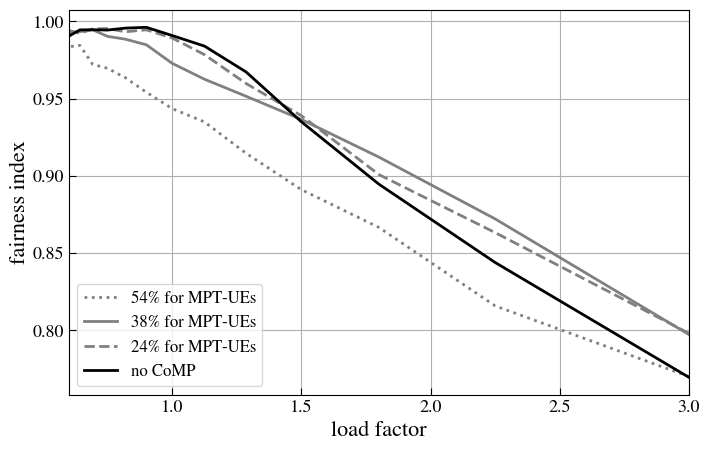

In [62]:
plt.figure(figsize=(fig_width,fig_height+2)) 
parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)

be=2
end=19
count=0

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

plt.plot(mu_range2[be:end],fcomp[27][be:end],color='grey',linestyle='dotted',label='54% for MPT-UEs',linewidth=2)
plt.plot(mu_range2[be:end],fcomp[19][be:end],color='grey',label='38% for MPT-UEs',linewidth=2)

plt.plot(mu_range2[be:end],fcomp[12][be:end],color='grey',linestyle='--',label='24% for MPT-UEs',linewidth=2)

plt.plot(mu_range2[be:end],fNocomp[27][be:end],color='black',label='no CoMP',linewidth=2)

#plt.plot(mu_range2[be:end],fairness_new2[be:end],color='dimgray',label='new solution',linewidth=4)

#plt.plot(mu_range[0:15],fcomp[15][0:15],color='#1f77b4',label='comp - 30%')

#plt.vlines(x=full_load,ymin=0.5,linestyle='dotted', ymax=1,colors='green',linewidth=2)

#plt.ylim(0,1)
#plt.legend()

plt.xlim(0.6,3)
#plt.ylim(-35,35)
plt.grid()
plt.xlabel('load factor')
plt.ylabel('fairness index',labelpad = 2)
#plt.vlines(x=58,ymin=0, ymax=1,ls=':',label='calculated prb size - mode1',colors='green')
plt.legend(prop={'size': 12},loc='lower left')

In [61]:
mu_range2

array([9.        , 4.5       , 3.        , 2.25      , 1.8       ,
       1.5       , 1.28571429, 1.125     , 1.        , 0.9       ,
       0.81818182, 0.75      , 0.69230769, 0.64285714, 0.6       ,
       0.5625    , 0.52941176, 0.5       , 0.47368421])

<Figure size 553.48x542.069 with 0 Axes>

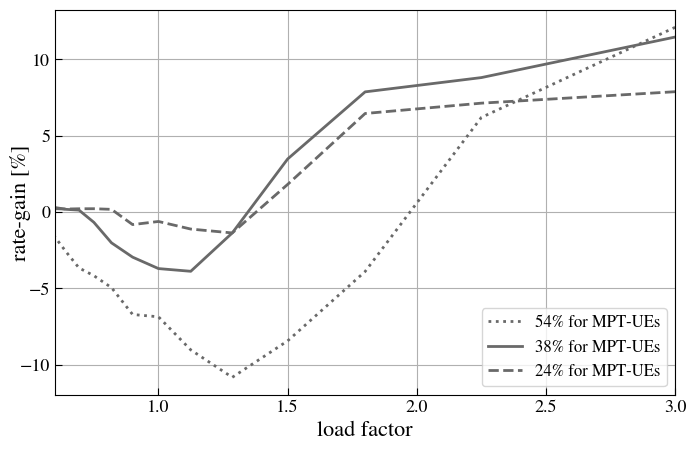

In [65]:
plt.figure(figsize=(fig_width,fig_height+2)) 

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)

be=2
end=19

count=0
plt.plot(mu_range2[be:end],mean_gain[27][be:end],color='dimgrey',linestyle='dotted', label='54% for MPT-UEs',linewidth=2)
plt.plot(mu_range2[be:end],list(mean_gain[19])[be:end],color='dimgrey',label='38% for MPT-UEs',linewidth=2)
plt.plot(mu_range2[be:end],mean_gain[12][be:end],color='dimgrey',linestyle='--',label='24% for MPT-UEs',linewidth=2)
plt.legend(fontsize=9)
#plt.xlim(0,16)
#plt.legend()
plt.xlim(0.6,3)
#plt.ylim(-35,35)
plt.grid()
plt.xlabel('load factor')
plt.ylabel('rate-gain [%]',labelpad = -8)
#plt.vlines(x=10,ymin=-12,linestyle='dotted', ymax=17,colors='green',linewidth=2)
plt.legend(prop={'size': 12},loc='lower right')

In [1195]:
mean_gain[19][2]

11.470375691734539

In [1176]:
if(scheduling=='pf_2'):
    range2=[27,19,12]
    gain_new2=np.array([])
    fairness_new2=np.array([])
    gain_new2=np.append(gain_new2,mean_gain[range2[2]][0:4])
    gain_new2=np.append(gain_new2,mean_gain[range2[1]][4:17])
    gain_new2=np.append(gain_new2,mean_gain[range2[0]][17::])
    fairness_new2=np.append(fairness_new2,fcomp[range2[2]][0:4])
    fairness_new2=np.append(fairness_new2,fcomp[range2[1]][4:17])
    fairness_new2=np.append(fairness_new2,fcomp[range2[0]][17::])
    new_approach_min_r2=np.array([])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[2]][0:4])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[1]][4:17])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[0]][17::])
if(scheduling=='pf-resback'):
    range2=[27,19,12]
    gain_new2=np.array([])
    fairness_new2=np.array([])
    gain_new2=np.append(gain_new2,mean_gain[range2[0]][0:2])
    gain_new2=np.append(gain_new2,mean_gain[range2[1]][2:5])
    gain_new2=np.append(gain_new2,mean_gain[range2[2]][5::])
    fairness_new2=np.append(fairness_new2,fcomp[range2[0]][0:2])
    fairness_new2=np.append(fairness_new2,fcomp[range2[1]][2:5])
    fairness_new2=np.append(fairness_new2,fcomp[range2[2]][5::])
    new_approach_min_r2=np.array([])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[0]][0:2])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[1]][2:5])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[2]][5::])
if(scheduling=='pf'):
    range2=[27,19,12]
    gain_new2=np.array([])
    fairness_new2=np.array([])
    gain_new2=np.append(gain_new2,mean_gain[range2[0]][0:2])
    gain_new2=np.append(gain_new2,mean_gain[range2[1]][2:6])
    gain_new2=np.append(gain_new2,mean_gain[range2[2]][6::])
    fairness_new2=np.append(fairness_new2,fcomp[range2[0]][0:2])
    fairness_new2=np.append(fairness_new2,fcomp[range2[1]][2:6])
    fairness_new2=np.append(fairness_new2,fcomp[range2[2]][6::])
    new_approach_min_r2=np.array([])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[0]][0:2])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[1]][2:6])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[2]][6::])
elif(scheduling=='rr'):
    range2=[27,19,12]
    gain_new2=np.array([])
    fairness_new2=np.array([])
    gain_new2=np.append(gain_new2,mean_gain[range2[0]][0:2])
    gain_new2=np.append(gain_new2,mean_gain[range2[1]][2:5])
    gain_new2=np.append(gain_new2,mean_gain[range2[2]][5::])
    fairness_new2=np.append(fairness_new2,fcomp[range2[0]][0:2])
    fairness_new2=np.append(fairness_new2,fcomp[range2[1]][2:5])
    fairness_new2=np.append(fairness_new2,fcomp[range2[2]][5::])
    new_approach_min_r2=np.array([])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[0]][0:2])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[1]][2:5])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[2]][5::])

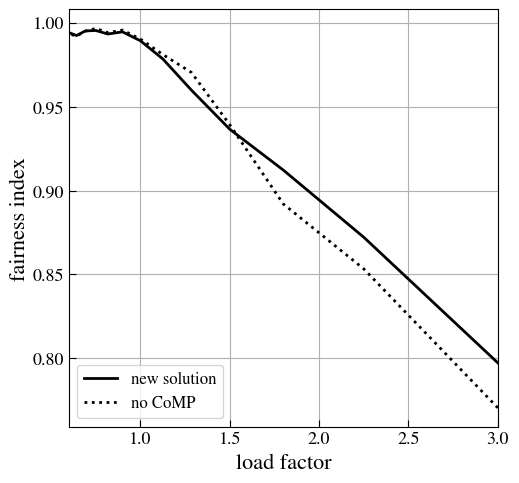

In [1177]:
plt.figure(figsize=(fig_width,fig_height+2)) 
parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)

be=2
end=19
plt.grid()
plt.xlim(0.6,3)
#plt.ylim(-35,35)
plt.xlabel('load factor')
plt.ylabel('fairness index',labelpad = 2)
#plt.vlines(x=58,ymin=0, ymax=1,ls=':',label='calculated prb size - mode1',colors='green')
plt.plot(mu_range2[be:end],fairness_new2[be:end],color='black',label='new solution',linewidth=2)
plt.plot(mu_range2[be:end],fNocomp[29][be:end],color='black',linestyle='dotted',label='no CoMP',linewidth=2)
plt.legend(prop={'size': 12},loc='lower left')

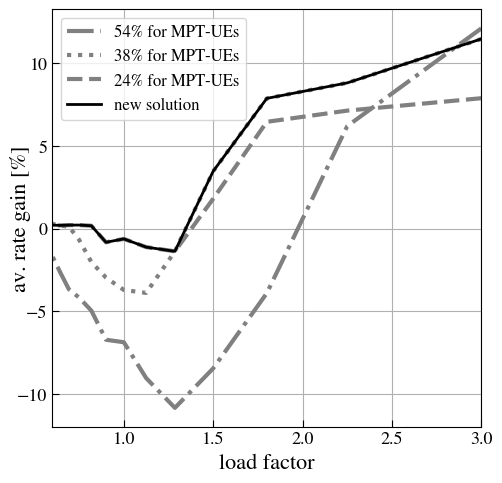

In [1180]:
plt.figure(figsize=(fig_width,fig_height+2)) 
parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)

be=2
end=19

plt.xlabel('load factor')
plt.ylabel('av. rate gain [%]',labelpad = -10)


#plt.plot(mu_range2[be:end],gain_new2[be:end],color='black',label='new solution',linewidth=2)
plt.plot(mu_range2[be:end],mean_gain[27][be:end],linestyle='dashdot',color='grey', label='54% for MPT-UEs',linewidth=3)
plt.plot(mu_range2[be:end],list(mean_gain[19])[be:end],linestyle='dotted',color='grey',label='38% for MPT-UEs',linewidth=3)
plt.plot(mu_range2[be:end],list(mean_gain[12])[be:end],linestyle='--',color='grey',label='24% for MPT-UEs',linewidth=3)
plt.plot(mu_range2[be:end],gain_new2[be:end],color='black',label='new solution',linewidth=2)

plt.xlim(0.6,3)
#plt.ylim(-35,35)
#plt.title('av. rate-gain',fontsize=11)
plt.legend(prop={'size': 12},loc='upper left')
plt.grid()


In [41]:
x=np.array([1,2,3,4,5,6,7,7,8])

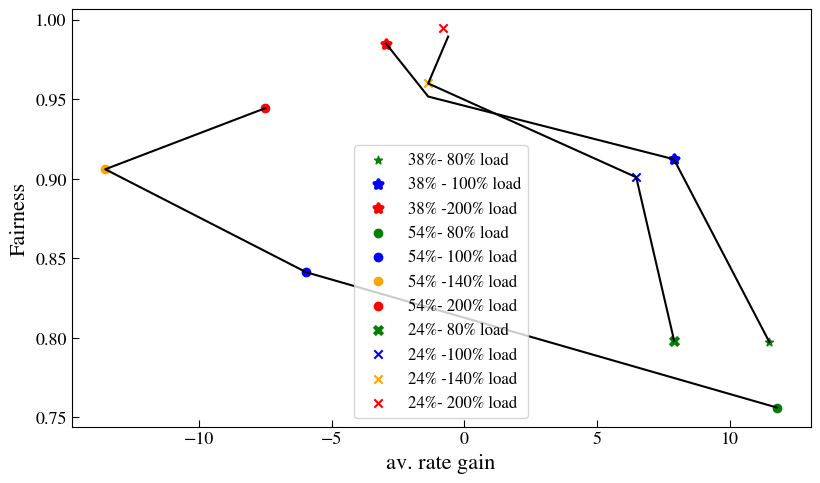

In [42]:
#import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(fig_width+4,fig_height+2)) 

plt.plot([mean_gain[19][2],mean_gain[19][4],mean_gain[19][6],mean_gain[19][9]],[fcomp[19][2],fcomp[19][4],fcomp[19][6],fcomp[19][9]],color='black')


plt.scatter(mean_gain[19][2],fcomp[19][2],marker='*',label='38%- 80% load',color='green')
plt.scatter(mean_gain[19][4],fcomp[19][4],marker='*',label='38% - 100% load',color='blue',linewidths=3)
#plt.scatter(mean_gain[19][4],fcomp[19][4],marker='*',label='100% load',)
plt.scatter(mean_gain[19][9],fcomp[19][9],marker='*',label='38% -200% load',color='red',linewidths=3)


plt.plot([mean_gain[29][2],mean_gain[29][4],mean_gain[29][6],mean_gain[29][9]],[fcomp[29][2],fcomp[29][4],fcomp[29][6],fcomp[29][9]],color='black')
plt.scatter(mean_gain[29][2],fcomp[29][2],label='54%- 80% load',color='green')
plt.scatter(mean_gain[29][4],fcomp[29][4],label='54%- 100% load',color='blue')
plt.scatter(mean_gain[29][6],fcomp[29][6],label='54% -140% load',color='orange')
#plt.scatter(mean_gain[19][4],fcomp[19][4],label='100% load')
plt.scatter(mean_gain[29][9],fcomp[29][9],label='54%- 200% load',color='red')


plt.plot([mean_gain[12][2],mean_gain[12][4],mean_gain[12][6],mean_gain[12][8]],[fcomp[12][2],fcomp[12][4],fcomp[12][6],fcomp[12][8]],color='black')
plt.scatter(mean_gain[12][2],fcomp[12][2],marker='x',label='24%- 80% load',color='green',linewidth=3)
plt.scatter(mean_gain[12][4],fcomp[12][4],marker='x',label='24% -100% load',color='blue')
plt.scatter(mean_gain[12][6],fcomp[12][6],marker='x',label='24% -140% load',color='orange')

#plt.scatter(mean_gain[19][4],fcomp[19][4],label='100% load')
plt.scatter(mean_gain[12][9],fcomp[12][9],marker='x',label='24%- 200% load',color='red')




plt.xlabel('av. rate gain')
plt.ylabel('Fairness')

#plt.scatter([mean_gain[19][2],mean_gain[19][4],mean_gain[19][8]],[fcomp[19][2],fcomp[19][4],fcomp[19][8]])
#plt.scatter([mean_gain[19][2],mean_gain[19][4],mean_gain[19][8]],[fNocomp[19][2],fNocomp[19][4],fNocomp[19][8]])
#plt.xlabel('rate-gain JT')
plt.legend(prop={'size': 12})

### More scenarios

In [4]:
ues=15
#cluster='newone'
cluster=0
strategy='A'


if(ues==10):
    if(strategy=='B'):
        file='50Rounds/result-10UEs.npy'
        be=1
    elif(strategy=='A'):
        file='50Rounds/result-10UEs-SA.npy'
        print('y')
        be=1
elif(ues==15):
    if(strategy=='B'):
        file='50Rounds/result.npy'
        beg=2
    elif(strategy=='A'):
        file='50Rounds/result-SA.npy'
        beg=2
elif(ues==5):
    if(strategy=='B'):
        file='50Rounds/result-5UEs.npy'
        beg=0
    elif(strategy=='A'):
        file='50Rounds/result-5UEs-SA.npy'
        beg=0
if(cluster=='newone'):
    file='50Rounds/result-c2.npy'
    beg=2

result = np.load(file,allow_pickle='TRUE').item()

mean_rate_Gain=result['mean_rate_Gain']
fcomp=result['fcomp']
fNocomp=result['fNocomp']
load_saver=result['load_saver']
mu_range=result['mu_range']

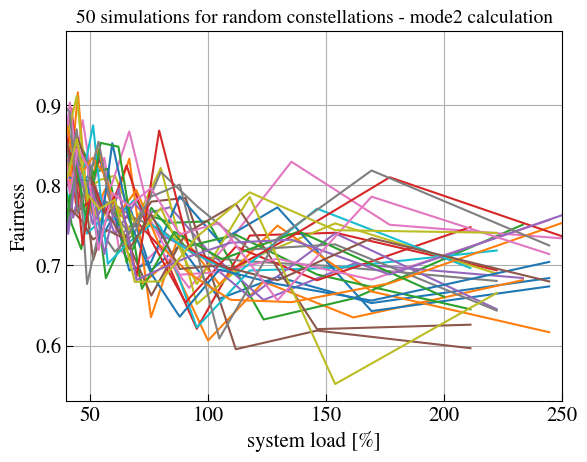

In [5]:
for i in np.arange(0,29):
    mu_range2=1/mu_range*load_saver[i]*100
    plt.plot(mu_range2[beg::],fcomp[i+1][beg::])
    #plt.plot(mu_range,fNocomp[i],'black')
plt.title('50 simulations for random constellations - mode2 calculation', fontsize=14)
plt.xlabel('system load [%]')
plt.ylabel('Fairness')
plt.xlim(40,250)
plt.grid()

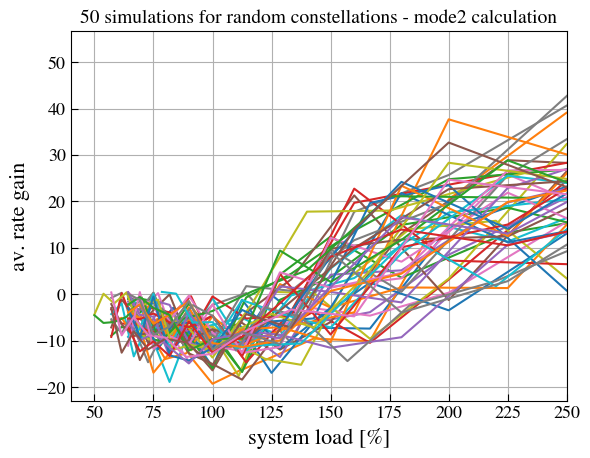

In [52]:
for i in np.arange(1,49):
    mu_range2=load_saver[i]/mu_range*100
    plt.plot(mu_range2[beg::],mean_rate_Gain[i+1][beg::])
    #plt.plot(mu_range,fNocomp[i],'black')
plt.title('50 simulations for random constellations - mode2 calculation', fontsize=14)
plt.xlabel('system load [%]')
plt.ylabel('av. rate gain')
plt.xlim(40,250)
plt.grid()

In [6]:
f_l=np.round(np.mean(load_saver))

In [7]:
fairness_diff_90=np.array([])
fairness_diff_10=np.array([])
fairness_diff_median=np.array([])
diff=np.array([])

mean_saver=np.array([])
min_saver=np.array([])
max_saver=np.array([])
med_saver=np.array([])
q10_saver=np.array([])
q90_saver=np.array([])
gain=np.array([])

fairness_comp_90=np.array([])
fairness_comp_10=np.array([])
fairness_comp_median=np.array([])
f_c=np.array([])

fairness_ncomp_90=np.array([])
fairness_ncomp_10=np.array([])
fairness_ncomp_median=np.array([])
f_nc=np.array([])


for i in mu_range:
    gain=np.array([])
    diff=np.array([])
    f_nc=np.array([])
    f_c=np.array([])
    for j in np.arange(1,20):
        diff=np.append(diff,fcomp[j][i-1]/fNocomp[j][i-1])
        f_c=np.append(f_c,fcomp[j][i-1])
        f_nc=np.append(f_nc,fNocomp[j][i-1])
        gain=np.append(gain,mean_rate_Gain[j][i-1])
    fairness_diff_90=np.append(fairness_diff_90,np.quantile(diff,0.9))
    fairness_diff_10=np.append(fairness_diff_10,np.quantile(diff,0.1))
    fairness_diff_median=np.append(fairness_diff_median,np.mean(diff))
    
    
    fairness_comp_90=np.append(fairness_comp_90,np.quantile(f_c,0.9))
    fairness_comp_10=np.append(fairness_comp_10,np.quantile(f_c,0.1))
    fairness_comp_median=np.append(fairness_comp_median,np.median(f_c))
        
    fairness_ncomp_90=np.append(fairness_ncomp_90,np.quantile(f_nc,0.9))
    fairness_ncomp_10=np.append(fairness_ncomp_10,np.quantile(f_nc,0.1))
    fairness_ncomp_median=np.append(fairness_ncomp_median,np.median(f_nc))
    
    
    mean_saver=np.append(mean_saver,np.mean(gain))
    min_saver=np.append(min_saver,np.min(gain))
    max_saver=np.append(max_saver,np.max(gain))
    med_saver=np.append(med_saver,np.median(gain))
    q10_saver=np.append(q10_saver,np.quantile(gain,0.1))
    q90_saver=np.append(q90_saver,np.quantile(gain,0.9))

IndexError: index 40 is out of bounds for axis 0 with size 38

ValueError: x and y must have same first dimension, but have shapes (38,) and (10,)

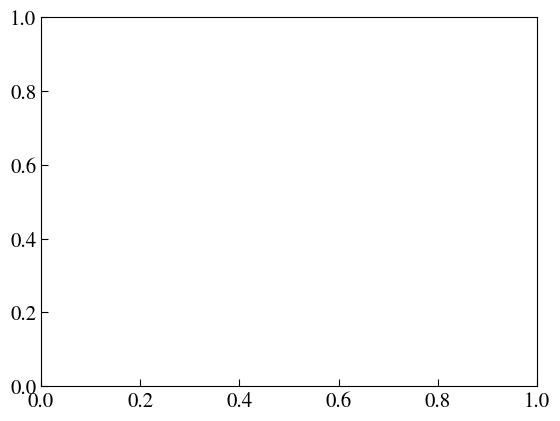

In [8]:
#plt.plot(mu_range[0:-1],fairness_diff)
beg=0
#end=-1

plt.plot(f_l/(mu_range[beg::]),fairness_comp_10[beg::],label='10% quantile comp',color='silver',linewidth=5)
plt.plot(f_l/(mu_range[beg::]),fairness_ncomp_10[beg::],label='10% quantile no comp',color='silver')#, linestyle='--')

plt.plot(f_l/(mu_range[beg::]),fairness_comp_90[beg::],label='90% quantile comp',color='grey',linewidth=5)
plt.plot(f_l/(mu_range[beg::]),fairness_ncomp_90[beg::],label='90% quantile no comp',color='grey')#,linestyle='--')

plt.plot(f_l/(mu_range[beg::]),fairness_comp_median[beg::],label='median comp',color='black',linewidth=5)
plt.plot(f_l/(mu_range[beg::]),fairness_ncomp_median[beg::],label='median no comp',color='black')#,linestyle='--')

plt.xlim(0.6,3)
plt.xlabel('load factor')
#plt.ylim(0.6,1)
plt.ylabel('fairness index')
plt.grid()
plt.legend(prop={'size': 12})

In [9]:
f_l

21.0

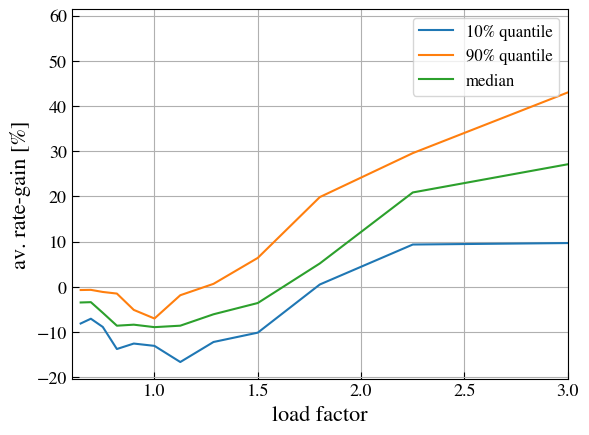

In [57]:
#end=-1

plt.plot(f_l/(mu_range[beg::]),q10_saver[beg::],label='10% quantile')
plt.plot(f_l/(mu_range[beg::]),q90_saver[beg::],label='90% quantile')
plt.plot(f_l/(mu_range[beg::]),med_saver[beg::],label='median')
#plt.title('50 simulations for random constellations - StrategyB calculation', fontsize=14)

plt.xlim(0.6,3)
plt.xlabel('load factor')
plt.ylabel('av. rate-gain [%]')
plt.grid()
plt.legend(prop={'size': 12})

In [58]:
file='50Rounds/result.npy'

result = np.load(file,allow_pickle='TRUE').item()

mean_rate_Gain=result['mean_rate_Gain']
fcomp=result['fcomp']
fNocomp=result['fNocomp']
load_saver=result['load_saver']
mu_range=result['mu_range']

fairness_diff_90=np.array([])
fairness_diff_10=np.array([])
fairness_diff_median=np.array([])
diff=np.array([])

mean_saver=np.array([])
min_saver=np.array([])
max_saver=np.array([])
med_saver=np.array([])
q10_saver=np.array([])
q90_saver=np.array([])
gain=np.array([])

fairness_comp_90=np.array([])
fairness_comp_10=np.array([])
fairness_comp_median=np.array([])
f_c=np.array([])

fairness_ncomp_90=np.array([])
fairness_ncomp_10=np.array([])
fairness_ncomp_median=np.array([])
f_nc=np.array([])


for i in mu_range:
    
    gain=np.array([])
    diff=np.array([])
    f_nc=np.array([])
    f_c=np.array([])
    for j in np.arange(1,50):
        diff=np.append(diff,fcomp[j][i-1]/fNocomp[j][i-1])
        f_c=np.append(f_c,fcomp[j][i-1])
        f_nc=np.append(f_nc,fNocomp[j][i-1])
        gain=np.append(gain,mean_rate_Gain[j][i-1])
    fairness_diff_90=np.append(fairness_diff_90,np.quantile(diff,0.9))
    fairness_diff_10=np.append(fairness_diff_10,np.quantile(diff,0.1))
    fairness_diff_median=np.append(fairness_diff_median,np.mean(diff))
    
    
    fairness_comp_90=np.append(fairness_comp_90,np.quantile(f_c,0.9))
    fairness_comp_10=np.append(fairness_comp_10,np.quantile(f_c,0.1))
    fairness_comp_median=np.append(fairness_comp_median,np.median(f_c))
        
    fairness_ncomp_90=np.append(fairness_ncomp_90,np.quantile(f_nc,0.9))
    fairness_ncomp_10=np.append(fairness_ncomp_10,np.quantile(f_nc,0.1))
    fairness_ncomp_median=np.append(fairness_ncomp_median,np.median(f_nc))
    
    
    mean_saver=np.append(mean_saver,np.mean(gain))
    min_saver=np.append(min_saver,np.min(gain))
    max_saver=np.append(max_saver,np.max(gain))
    med_saver=np.append(med_saver,np.median(gain))
    q10_saver=np.append(q10_saver,np.quantile(gain,0.1))
    q90_saver=np.append(q90_saver,np.quantile(gain,0.9))

In [59]:
file='50Rounds/result-SA.npy'

result = np.load(file,allow_pickle='TRUE').item()

mean_rate_Gain=result['mean_rate_Gain']
fcomp=result['fcomp']
fNocomp=result['fNocomp']
load_saver=result['load_saver']
mu_range=result['mu_range']

fairness_diff_90_A=np.array([])
fairness_diff_10_A=np.array([])
fairness_diff_median_A=np.array([])
diff_A=np.array([])

mean_saver_A=np.array([])
min_saver_A=np.array([])
max_saver_A=np.array([])
med_saver_A=np.array([])
q10_saver_A=np.array([])
q90_saver_A=np.array([])
gain=np.array([])

fairness_comp_90_A=np.array([])
fairness_comp_10_A=np.array([])
fairness_comp_median_A=np.array([])

fairness_ncomp_90_A=np.array([])
fairness_ncomp_10_A=np.array([])
fairness_ncomp_median_A=np.array([])


for i in mu_range:
    
    gain=np.array([])
    diff=np.array([])
    f_nc=np.array([])
    f_c=np.array([])
    for j in np.arange(1,50):
        diff=np.append(diff,fcomp[j][i-1]/fNocomp[j][i-1])
        f_c=np.append(f_c,fcomp[j][i-1])
        f_nc=np.append(f_nc,fNocomp[j][i-1])
        gain=np.append(gain,mean_rate_Gain[j][i-1])
    fairness_diff_90_A=np.append(fairness_diff_90_A,np.quantile(diff,0.9))
    fairness_diff_10_A=np.append(fairness_diff_10_A,np.quantile(diff,0.1))
    fairness_diff_median_A=np.append(fairness_diff_median_A,np.mean(diff))
    
    
    fairness_comp_90_A=np.append(fairness_comp_90_A,np.quantile(f_c,0.9))
    fairness_comp_10_A=np.append(fairness_comp_10_A,np.quantile(f_c,0.1))
    fairness_comp_median_A=np.append(fairness_comp_median_A,np.median(f_c))
        
    fairness_ncomp_90_A=np.append(fairness_ncomp_90_A,np.quantile(f_nc,0.9))
    fairness_ncomp_10_A=np.append(fairness_ncomp_10_A,np.quantile(f_nc,0.1))
    fairness_ncomp_median_A=np.append(fairness_ncomp_median_A,np.median(f_nc))
    
    
    mean_saver_A=np.append(mean_saver_A,np.mean(gain))
    min_saver_A=np.append(min_saver_A,np.min(gain))
    max_saver_A=np.append(max_saver_A,np.max(gain))
    med_saver_A=np.append(med_saver_A,np.median(gain))
    q10_saver_A=np.append(q10_saver_A,np.quantile(gain,0.1))
    q90_saver_A=np.append(q90_saver_A,np.quantile(gain,0.9))

In [60]:
file='50Rounds/result-10UEs.npy'

result = np.load(file,allow_pickle='TRUE').item()

mean_rate_Gain=result['mean_rate_Gain']
fcomp=result['fcomp']
fNocomp=result['fNocomp']
load_saver_10=result['load_saver']
mu_range=result['mu_range']


fairness_diff_90_10UEs=np.array([])
fairness_diff_10_10UEs=np.array([])
fairness_diff_median_10UEs=np.array([])
diff_10UEs=np.array([])

mean_saver_10UEs=np.array([])
min_saver_10UEs=np.array([])
max_saver_10UEs=np.array([])
med_saver_10UEs=np.array([])
q10_saver_10UEs=np.array([])
q90_saver_10UEs=np.array([])
gain_10UEs=np.array([])

fairness_comp_90_10UEs=np.array([])
fairness_comp_10_10UEs=np.array([])
fairness_comp_median_10UEs=np.array([])
f_c=np.array([])

fairness_ncomp_90_10UEs=np.array([])
fairness_ncomp_10_10UEs=np.array([])
fairness_ncomp_median_10UEs=np.array([])
f_nc=np.array([])


for i in mu_range:
    gain=np.array([])
    diff=np.array([])
    f_c=np.array([])
    f_nc=np.array([])
    for j in np.arange(1,50):
        diff=np.append(diff,fcomp[j][i-1]/fNocomp[j][i-1])
        f_c=np.append(f_c,fcomp[j][i-1])
        f_nc=np.append(f_nc,fNocomp[j][i-1])
        gain=np.append(gain,mean_rate_Gain[j][i-1])
    fairness_diff_90_10UEs=np.append(fairness_diff_90_10UEs,np.quantile(diff,0.9))
    fairness_diff_10_10UEs=np.append(fairness_diff_10_10UEs,np.quantile(diff,0.1))
    fairness_diff_median_10UEs=np.append(fairness_diff_median_10UEs,np.mean(diff))
    
    
    fairness_comp_90_10UEs=np.append(fairness_comp_90_10UEs,np.quantile(f_c,0.9))
    fairness_comp_10_10UEs=np.append(fairness_comp_10_10UEs,np.quantile(f_c,0.1))
    fairness_comp_median_10UEs=np.append(fairness_comp_median_10UEs,np.median(f_c))
        
    fairness_ncomp_90_10UEs=np.append(fairness_ncomp_90_10UEs,np.quantile(f_nc,0.9))
    fairness_ncomp_10_10UEs=np.append(fairness_ncomp_10_10UEs,np.quantile(f_nc,0.1))
    fairness_ncomp_median_10UEs=np.append(fairness_ncomp_median_10UEs,np.median(f_nc))
    
    
    mean_saver_10UEs=np.append(mean_saver_10UEs,np.mean(gain))
    min_saver_10UEs=np.append(min_saver_10UEs,np.min(gain))
    max_saver_10UEs=np.append(max_saver_10UEs,np.max(gain))
    med_saver_10UEs=np.append(med_saver_10UEs,np.median(gain))
    q10_saver_10UEs=np.append(q10_saver_10UEs,np.quantile(gain,0.1))
    q90_saver_10UEs=np.append(q90_saver_10UEs,np.quantile(gain,0.9))

In [61]:
file='50Rounds/result-10UEs-SA.npy'

result = np.load(file,allow_pickle='TRUE').item()

mean_rate_Gain=result['mean_rate_Gain']
fcomp=result['fcomp']
fNocomp=result['fNocomp']
load_saver_10=result['load_saver']
mu_range=result['mu_range']


fairness_diff_90_10UEs_B=np.array([])
fairness_diff_10_10UEs_B=np.array([])
fairness_diff_median_10UEs_B=np.array([])
diff_10UEs_B=np.array([])

mean_saver_10UEs_B=np.array([])
min_saver_10UEs_B=np.array([])
max_saver_10UEs_B=np.array([])
med_saver_10UEs_B=np.array([])
q10_saver_10UEs_B=np.array([])
q90_saver_10UEs_B=np.array([])
gain_10UEs_B=np.array([])

fairness_comp_90_10UEs_B=np.array([])
fairness_comp_10_10UEs_B=np.array([])
fairness_comp_median_10UEs_B=np.array([])

fairness_ncomp_90_10UEs_B=np.array([])
fairness_ncomp_10_10UEs_B=np.array([])
fairness_ncomp_median_10UEs_B=np.array([])



for i in mu_range:
    gain=np.array([])
    diff=np.array([])
    f_c=np.array([])
    f_nc=np.array([])
    for j in np.arange(1,50):
        diff=np.append(diff,fcomp[j][i-1]/fNocomp[j][i-1])
        f_c=np.append(f_c,fcomp[j][i-1])
        f_nc=np.append(f_nc,fNocomp[j][i-1])
        gain=np.append(gain,mean_rate_Gain[j][i-1])
    fairness_diff_90_10UEs_B=np.append(fairness_diff_90_10UEs_B,np.quantile(diff,0.9))
    fairness_diff_10_10UEs_B=np.append(fairness_diff_10_10UEs_B,np.quantile(diff,0.1))
    fairness_diff_median_10UEs_B=np.append(fairness_diff_median_10UEs_B,np.mean(diff))
    
    
    fairness_comp_90_10UEs_B=np.append(fairness_comp_90_10UEs_B,np.quantile(f_c,0.9))
    fairness_comp_10_10UEs_B=np.append(fairness_comp_10_10UEs_B,np.quantile(f_c,0.1))
    fairness_comp_median_10UEs_B=np.append(fairness_comp_median_10UEs_B,np.median(f_c))
        
    fairness_ncomp_90_10UEs_B=np.append(fairness_ncomp_90_10UEs_B,np.quantile(f_nc,0.9))
    fairness_ncomp_10_10UEs_B=np.append(fairness_ncomp_10_10UEs_B,np.quantile(f_nc,0.1))
    fairness_ncomp_median_10UEs_B=np.append(fairness_ncomp_median_10UEs_B,np.median(f_nc))
    
    
    mean_saver_10UEs_B=np.append(mean_saver_10UEs_B,np.mean(gain))
    min_saver_10UEs_B=np.append(min_saver_10UEs_B,np.min(gain))
    max_saver_10UEs_B=np.append(max_saver_10UEs_B,np.max(gain))
    med_saver_10UEs_B=np.append(med_saver_10UEs_B,np.median(gain))
    q10_saver_10UEs_B=np.append(q10_saver_10UEs_B,np.quantile(gain,0.1))
    q90_saver_10UEs_B=np.append(q90_saver_10UEs_B,np.quantile(gain,0.9))

In [62]:
file='50Rounds/result-5UEs.npy'

result = np.load(file,allow_pickle='TRUE').item()

mean_rate_Gain=result['mean_rate_Gain']
fcomp=result['fcomp']
fNocomp=result['fNocomp']
load_saver_5=result['load_saver']
mu_range=result['mu_range']

fairness_diff_90_5UEs=np.array([])
fairness_diff_10_5UEs=np.array([])
fairness_diff_median_5UEs=np.array([])
diff_5UEs=np.array([])

mean_saver_5UEs=np.array([])
min_saver_5UEs=np.array([])
max_saver_5UEs=np.array([])
med_saver_5UEs=np.array([])
q10_saver_5UEs=np.array([])
q90_saver_5UEs=np.array([])
gain_5UEs=np.array([])

fairness_comp_90_5UEs=np.array([])
fairness_comp_10_5UEs=np.array([])
fairness_comp_median_5UEs=np.array([])
f_c_5UEs=np.array([])

fairness_ncomp_90_5UEs=np.array([])
fairness_ncomp_10_5UEs=np.array([])
fairness_ncomp_median_5UEs=np.array([])
f_nc_5UEs=np.array([])


for i in mu_range:
    gain=np.array([])
    diff=np.array([])
    f_nc=np.array([])
    f_c=np.array([])
    for j in np.arange(1,50):
        diff=np.append(diff,fcomp[j][i-1]/fNocomp[j][i-1])
        f_c=np.append(f_c,fcomp[j][i-1])
        f_nc=np.append(f_nc,fNocomp[j][i-1])
        gain=np.append(gain,mean_rate_Gain[j][i-1])
    fairness_diff_90_5UEs=np.append(fairness_diff_90_5UEs,np.quantile(diff,0.9))
    fairness_diff_10_5UEs=np.append(fairness_diff_10_5UEs,np.quantile(diff,0.1))
    fairness_diff_median_5UEs=np.append(fairness_diff_median_5UEs,np.mean(diff))
    
    
    fairness_comp_90_5UEs=np.append(fairness_comp_90_5UEs,np.quantile(f_c,0.9))
    fairness_comp_10_5UEs=np.append(fairness_comp_10_5UEs,np.quantile(f_c,0.1))
    fairness_comp_median_5UEs=np.append(fairness_comp_median_5UEs,np.median(f_c))
        
    fairness_ncomp_90_5UEs=np.append(fairness_ncomp_90_5UEs,np.quantile(f_nc,0.9))
    fairness_ncomp_10_5UEs=np.append(fairness_ncomp_10_5UEs,np.quantile(f_nc,0.1))
    fairness_ncomp_median_5UEs=np.append(fairness_ncomp_median_5UEs,np.median(f_nc))
    
    
    mean_saver_5UEs=np.append(mean_saver_5UEs,np.mean(gain))
    min_saver_5UEs=np.append(min_saver_5UEs,np.min(gain))
    max_saver_5UEs=np.append(max_saver_5UEs,np.max(gain))
    med_saver_5UEs=np.append(med_saver_5UEs,np.median(gain))
    q10_saver_5UEs=np.append(q10_saver_5UEs,np.quantile(gain,0.1))
    q90_saver_5UEs=np.append(q90_saver_5UEs,np.quantile(gain,0.9))

In [63]:
file='50Rounds/result-5UEs-SA.npy'

result = np.load(file,allow_pickle='TRUE').item()

mean_rate_Gain=result['mean_rate_Gain']
fcomp=result['fcomp']
fNocomp=result['fNocomp']
load_saver_5=result['load_saver']
mu_range=result['mu_range']

fairness_diff_90_5UEs_A=np.array([])
fairness_diff_10_5UEs_A=np.array([])
fairness_diff_median_5UEs_A=np.array([])
diff_5UEs_A=np.array([])

mean_saver_5UEs_A=np.array([])
min_saver_5UEs_A=np.array([])
max_saver_5UEs_A=np.array([])
med_saver_5UEs_A=np.array([])
q10_saver_5UEs_A=np.array([])
q90_saver_5UEs_A=np.array([])
gain_5UEs_A=np.array([])

fairness_comp_90_5UEs_A=np.array([])
fairness_comp_10_5UEs_A=np.array([])
fairness_comp_median_5UEs_A=np.array([])
f_c_5UEs_A=np.array([])

fairness_ncomp_90_5UEs_A=np.array([])
fairness_ncomp_10_5UEs_A=np.array([])
fairness_ncomp_median_5UEs_A=np.array([])
f_nc_5UEs_A=np.array([])


for i in mu_range:
    gain=np.array([])
    diff=np.array([])
    f_nc=np.array([])
    f_c=np.array([])
    for j in np.arange(1,50):
        diff=np.append(diff,fcomp[j][i-1]/fNocomp[j][i-1])
        f_c=np.append(f_c,fcomp[j][i-1])
        f_nc=np.append(f_nc,fNocomp[j][i-1])
        gain=np.append(gain,mean_rate_Gain[j][i-1])
    fairness_diff_90_5UEs_A=np.append(fairness_diff_90_5UEs_A,np.quantile(diff,0.9))
    fairness_diff_10_5UEs_A=np.append(fairness_diff_10_5UEs_A,np.quantile(diff,0.1))
    fairness_diff_median_5UEs_A=np.append(fairness_diff_median_5UEs_A,np.mean(diff))
    
    
    fairness_comp_90_5UEs_A=np.append(fairness_comp_90_5UEs_A,np.quantile(f_c,0.9))
    fairness_comp_10_5UEs_A=np.append(fairness_comp_10_5UEs_A,np.quantile(f_c,0.1))
    fairness_comp_median_5UEs_A=np.append(fairness_comp_median_5UEs_A,np.median(f_c))
        
    fairness_ncomp_90_5UEs_A=np.append(fairness_ncomp_90_5UEs_A,np.quantile(f_nc,0.9))
    fairness_ncomp_10_5UEs_A=np.append(fairness_ncomp_10_5UEs_A,np.quantile(f_nc,0.1))
    fairness_ncomp_median_5UEs_A=np.append(fairness_ncomp_median_5UEs_A,np.median(f_nc))
    
    
    mean_saver_5UEs_A=np.append(mean_saver_5UEs_A,np.mean(gain))
    min_saver_5UEs_A=np.append(min_saver_5UEs_A,np.min(gain))
    max_saver_5UEs_A=np.append(max_saver_5UEs_A,np.max(gain))
    med_saver_5UEs_A=np.append(med_saver_5UEs_A,np.median(gain))
    q10_saver_5UEs_A=np.append(q10_saver_5UEs_A,np.quantile(gain,0.1))
    q90_saver_5UEs_A=np.append(q90_saver_5UEs_A,np.quantile(gain,0.9))

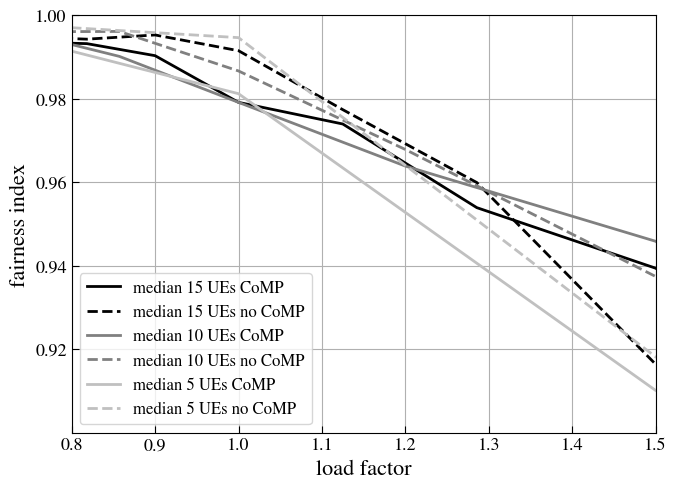

In [64]:
#plt.figure(figsize=(10,8)) 
fsize = 15 # Allgemein
tsize = 18 # Legende

tdir = 'in'
major = 5.0 # Länge major ticks
minor = 3.0 # Länge minor ticks
lwidth = 0.8 # Dicke Rahmen
lhandle = 2.0 # Länge handle in Legende
plt.style.use('default')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

# Bildgroesse
fig_width_pt = 400  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches

no_c=np.array([])
c=np.array([])
for i in prb_range:
    c=np.append(c,fcomp[i][1])
    no_c=np.append(no_c,fNocomp[i][1])



plt.figure(figsize=(fig_width+2,fig_height+2)) 
parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)



beg=0
plt.plot(9/mu_range[beg::],fairness_comp_median[beg::],label='median 15 UEs CoMP',color='black', linewidth=2)
plt.plot(9/mu_range[beg::],fairness_ncomp_median[beg::],label='median 15 UEs no CoMP',color='black',linestyle='--', linewidth=2)

beg=0
#end=-1
plt.plot(6/mu_range[beg::],fairness_comp_median_10UEs[beg::],label='median 10 UEs CoMP',color='grey', linewidth=2)
plt.plot(6/mu_range[beg::],fairness_ncomp_median_10UEs[beg::],label='median 10 UEs no CoMP',color='grey',linestyle='--', linewidth=2)

beg=0
#end=-1
plt.plot(3/mu_range[beg:end],fairness_comp_median_5UEs[beg:end],label='median 5 UEs CoMP',color='silver', linewidth=2)
plt.plot(3/mu_range[beg:end],fairness_ncomp_median_5UEs[beg:end],label='median 5 UEs no CoMP',color='silver',linestyle='--', linewidth=2)


#plt.xlim(0,250)
plt.xlim(0.8,1.5)
plt.ylim(0.90001,1)
plt.xlabel('load factor')
plt.ylabel('fairness index')
plt.grid()
plt.legend(prop={'size': 12})

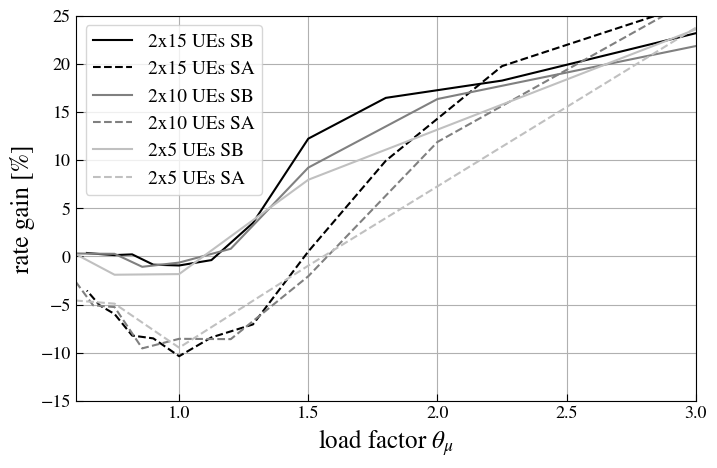

In [66]:
#plt.figure(figsize=(10,8)) 
#plt.figure(figsize=(10,8)) 
fsize = 15 # Allgemein
tsize = 18 # Legende

tdir = 'in'
major = 5.0 # Länge major ticks
minor = 3.0 # Länge minor ticks
lwidth = 0.8 # Dicke Rahmen
lhandle = 2.0 # Länge handle in Legende
plt.style.use('default')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

# Bildgroesse
fig_width_pt = 400  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches

no_c=np.array([])
c=np.array([])
for i in prb_range:
    c=np.append(c,fcomp[i][1])
    no_c=np.append(no_c,fNocomp[i][1])



#plt.figure(figsize=(fig_width+2,fig_height+2)) 

parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)


f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

beg=2
end=-1
plt.plot(9/mu_range[beg::],med_saver[beg::],label='2x15 UEs SB',color='black')
plt.plot(9/mu_range[beg::],med_saver_A[beg::],label='2x15 UEs SA',linestyle='--',color='black')
#plt.plot(9/mu_range[beg:end]*100,med_saver[beg::],label='median no comp 15 UEs',color='black',linestyle='--')

beg=1
end=-1
plt.plot(6/mu_range[beg::],med_saver_10UEs[beg::],label='2x10 UEs SB',color='grey')
plt.plot(6/mu_range[beg::],med_saver_10UEs_B[beg::],linestyle='--',label='2x10 UEs SA',color='grey')
#plt.plot(6/mu_range[beg:end]*100,med_saver_10UEs[beg::],label='median no comp 10 UEs',color='grey',linestyle='--')

beg=0
end=-2
plt.plot(3/mu_range[beg::],med_saver_5UEs[beg::],label='2x5 UEs SB',color='silver')
plt.plot(3/mu_range[beg::],med_saver_5UEs_A[beg::],linestyle='--',label='2x5 UEs SA',color='silver')
#plt.plot(3/mu_range[beg:end]*100,med_saver_5UEs[beg:-1],label='median no comp 5 UEs',color='silver',linestyle='--')



plt.xlabel('load factor $\u03B8_{\mu}$',fontsize=18)
plt.xlim(0.6,3)
plt.ylim(-15,25)

plt.ylabel('rate gain [%]',fontsize=18)
plt.grid()
plt.legend(prop={'size': 14})

In [67]:
file='50Rounds/result.npy'

result = np.load(file,allow_pickle='TRUE').item()

mean_rate_Gain=result['mean_rate_Gain']
fcomp=result['fcomp']
fNocomp=result['fNocomp']
load_saver_5=result['load_saver']
mu_range=result['mu_range']
f_l=int(np.round(np.mean(load_saver)))

fairnes_c_load_100=np.array([])
fairnes_nc_load_100=np.array([])
gain_load_100=np.array([])
fairnes_c_load_200=np.array([])
fairnes_nc_load_200=np.array([])
gain_load_200=np.array([])
fairnes_c_load_150=np.array([])
fairnes_nc_load_150=np.array([])
gain_load_150=np.array([])

for j in np.arange(1,50):
    fairnes_c_load_100=np.append(fairnes_c_load_100,fcomp[j][f_l-1])
    fairnes_nc_load_100=np.append(fairnes_nc_load_100,fNocomp[j][f_l-1])
    gain_load_100=np.append(gain_load_100,mean_rate_Gain[j][f_l-1])
    
    fairnes_c_load_200=np.append(fairnes_c_load_200,fcomp[j][2])
    fairnes_nc_load_200=np.append(fairnes_nc_load_200,fNocomp[j][2])
    gain_load_200=np.append(gain_load_200,mean_rate_Gain[j][2])
    
    fairnes_c_load_150=np.append(fairnes_c_load_150,fcomp[j][5])
    fairnes_nc_load_150=np.append(fairnes_nc_load_150,fNocomp[j][5])
    gain_load_150=np.append(gain_load_150,mean_rate_Gain[j][5])  
    

In [68]:
file='50Rounds/result-10UEs.npy'

result = np.load(file,allow_pickle='TRUE').item()

mean_rate_Gain=result['mean_rate_Gain']
fcomp=result['fcomp']
fNocomp=result['fNocomp']
load_saver_10=result['load_saver']
mu_range=result['mu_range']
f_l=int(np.round(np.mean(load_saver_10)))

fairnes_c_load_100_10=np.array([])
fairnes_nc_load_100_10=np.array([])
gain_load_100_10=np.array([])
fairnes_c_load_200_10=np.array([])
fairnes_nc_load_200_10=np.array([])
gain_load_200_10=np.array([])
fairnes_c_load_150_10=np.array([])
fairnes_nc_load_150_10=np.array([])
gain_load_150_10=np.array([])

for j in np.arange(1,50):
    fairnes_c_load_100_10=np.append(fairnes_c_load_100_10,fcomp[j][f_l-1])
    fairnes_nc_load_100_10=np.append(fairnes_nc_load_100_10,fNocomp[j][f_l-1])
    gain_load_100_10=np.append(gain_load_100_10,mean_rate_Gain[j][f_l-1])
    
    fairnes_c_load_200_10=np.append(fairnes_c_load_200_10,fcomp[j][1])
    fairnes_nc_load_200_10=np.append(fairnes_nc_load_200_10,fNocomp[j][1])
    gain_load_200_10=np.append(gain_load_200_10,mean_rate_Gain[j][1])
    
      
    fairnes_c_load_150_10=np.append(fairnes_c_load_150_10,fcomp[j][3])
    fairnes_nc_load_150_10=np.append(fairnes_nc_load_150_10,fNocomp[j][3])
    gain_load_150_10=np.append(gain_load_150_10,mean_rate_Gain[j][3])  

In [69]:
file='50Rounds/result-5UEs.npy'

result = np.load(file,allow_pickle='TRUE').item()

mean_rate_Gain=result['mean_rate_Gain']
fcomp=result['fcomp']
fNocomp=result['fNocomp']
load_saver_5=result['load_saver']
mu_range=result['mu_range']
f_l=int(np.round(np.mean(load_saver_5)))

fairnes_c_load_100_5=np.array([])
fairnes_nc_load_100_5=np.array([])
gain_load_100_5=np.array([])
fairnes_c_load_200_5=np.array([])
fairnes_nc_load_200_5=np.array([])
gain_load_200_5=np.array([])
fairnes_c_load_150_5=np.array([])
fairnes_nc_load_150_5=np.array([])
gain_load_150_5=np.array([])

for j in np.arange(1,50):
    fairnes_c_load_100_5=np.append(fairnes_c_load_100_5,fcomp[j][f_l-1])
    fairnes_nc_load_100_5=np.append(fairnes_nc_load_100_5,fNocomp[j][f_l-1])
    gain_load_100_5=np.append(gain_load_100_5,mean_rate_Gain[j][f_l-1])
    
    fairnes_c_load_200_5=np.append(fairnes_c_load_200_5,fcomp[j][0])
    fairnes_nc_load_200_5=np.append(fairnes_nc_load_200_5,fNocomp[j][0])
    gain_load_200_5=np.append(gain_load_200_5,mean_rate_Gain[j][0])
    
      
    fairnes_c_load_150_5=np.append(fairnes_c_load_150_5,fcomp[j][1])
    fairnes_nc_load_150_5=np.append(fairnes_nc_load_150_5,fNocomp[j][1])
    gain_load_150_5=np.append(gain_load_150_5,mean_rate_Gain[j][1])  

In [75]:
def cdf(data,legende1,color1,data2,legende2,color2,data3,legende3,color3,data4,legende4,color4,data5,legende5,color5,data6,legende6, color6,data7,legende7,color7,data8,legende8,color8,data9,legende9,color9,titel,xbereich1,xbereich2,xachse,bins):
    count, bins_count = np.histogram(data, bins)
    count2, bins_count2 = np.histogram(data2, bins)
    count3, bins_count3 = np.histogram(data3, bins)
    count4, bins_count4 = np.histogram(data4, bins)
    count5, bins_count5 = np.histogram(data5, bins)
    count6, bins_count6 = np.histogram(data6, bins)
    count7, bins_count7 = np.histogram(data7, bins)
    count8, bins_count8 = np.histogram(data8, bins)
    count9, bins_count9 = np.histogram(data9, bins)
    
    
    pdf = count / sum(count)
    pdf2 = count2 / sum(count2)
    pdf3 = count3 / sum(count3)
    pdf4 = count4 / sum(count4)
    pdf5 = count5 / sum(count5)
    pdf6 = count6 / sum(count6)
    pdf7 = count7 / sum(count7)
    pdf8 = count8 / sum(count8)
    pdf9 = count9 / sum(count9)
    
    cdf = np.cumsum(pdf)
    cdf2 = np.cumsum(pdf2)
    cdf3 = np.cumsum(pdf3)
    cdf4 = np.cumsum(pdf4)
    cdf5 = np.cumsum(pdf5)
    cdf6 = np.cumsum(pdf6)
    cdf7 = np.cumsum(pdf7)
    cdf8 = np.cumsum(pdf8)
    cdf9 = np.cumsum(pdf9)

    # plotting PDF and CDF
    f = plt.figure()
    f.set_figwidth(8)
    f.set_figheight(5)

    parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
    plt.rcParams.update(parameters)
    
    plt.plot(bins_count[1:], cdf, color=color1, label=legende1)
    plt.plot(bins_count2[1:], cdf2, color=color2,linestyle='dotted', label=legende2)
    plt.plot(bins_count3[1:], cdf3, color=color3,linestyle='--', label=legende3)#, linewidth=3)
    #plt.plot(bins_count3[1:], cdf3, color=color3,linestyle='--', label=legende3)#, linewidth=3)
    
    
    plt.plot(bins_count4[1:], cdf4, color=color4, label=legende4)
    plt.plot(bins_count5[1:], cdf5, color=color5,linestyle='dotted', label=legende5)
    plt.plot(bins_count6[1:], cdf6, color=color6,linestyle='--', label=legende6)
    
    plt.plot(bins_count7[1:], cdf7, color=color7, label=legende7)
    plt.plot(bins_count8[1:], cdf8, color=color8,linestyle='dotted', label=legende8)
    plt.plot(bins_count9[1:], cdf9, color=color9,linestyle='--', label=legende9)
    
    
    plt.title(titel)
    
    plt.legend(fontsize=14)
    plt.grid()
    plt.ylim([0,1])
    plt.xlim([-20,50])
    plt.xlabel(xachse,fontsize=18)
    plt.ylabel('CDF',fontsize=18)
    
    print(legende1)
    print('10% Quantil:', np.percentile(data, 10)) 
    print('90% Quantil:', np.percentile(data, 90)) 
    print('50% Quantil (Median):', np.percentile(data, 50)) 
    print(legende2)
    print('10% Quantil:', np.percentile(data2, 10)) 
    print('90% Quantil:', np.percentile(data2, 90)) 
    print('50% Quantil (Median):', np.percentile(data2, 50))
    print(legende3)
    print('10% Quantil:', np.percentile(data3, 10)) 
    print('90% Quantil:', np.percentile(data3, 90)) 
    print('50% Quantil (Median):', np.percentile(data3, 50))

2x15 UEs
10% Quantil: -4.679595199545566
90% Quantil: 0.9396343132587979
50% Quantil (Median): -0.9443151907735355
2x10 UEs
10% Quantil: -4.852228143042387
90% Quantil: 1.9146532400515879
50% Quantil (Median): -0.6432312530129841
2x5 UEs
10% Quantil: -7.2067302665291635
90% Quantil: 5.40215085290942
50% Quantil (Median): -1.838340308025599


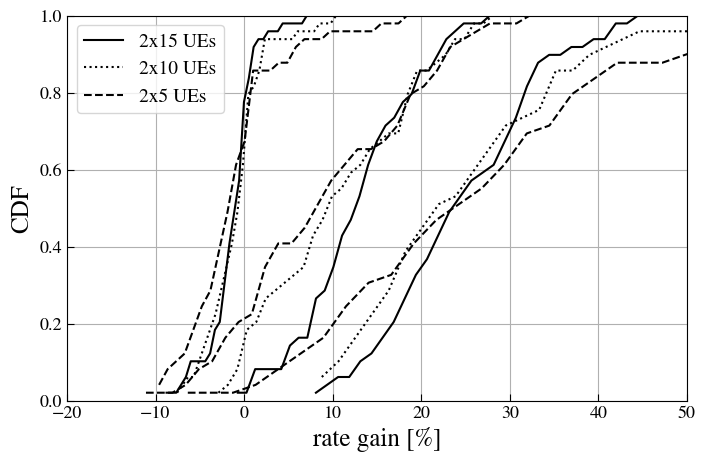

In [76]:
cdf(gain_load_100,'2x15 UEs','black',gain_load_100_10,'2x10 UEs','black',gain_load_100_5,'2x5 UEs','black',gain_load_150,'','black',gain_load_150_10,'','black',gain_load_150_5,'','black',gain_load_200,'','black',gain_load_200_10,'','black',gain_load_200_5,'','black','',np.min(gain_load_100),np.max(gain_load_200),'rate gain [%]',30)
#gain_load_150,'150% load 15 UEs','silver',gain_load_150_10,'150% load 10 UEs','silver',gain_load_150_5,'150% load 5 UEs','silver',


In [77]:
file='50Rounds/result-SA.npy'

result = np.load(file,allow_pickle='TRUE').item()

mean_rate_Gain=result['mean_rate_Gain']
fcomp=result['fcomp']
fNocomp=result['fNocomp']
load_saver_5=result['load_saver']
mu_range=result['mu_range']
f_l=int(np.round(np.mean(load_saver)))

fairnes_c_load_100=np.array([])
fairnes_nc_load_100=np.array([])
gain_load_100=np.array([])
fairnes_c_load_200=np.array([])
fairnes_nc_load_200=np.array([])
gain_load_200=np.array([])
fairnes_c_load_150=np.array([])
fairnes_nc_load_150=np.array([])
gain_load_150=np.array([])

for j in np.arange(1,50):
    fairnes_c_load_100=np.append(fairnes_c_load_100,fcomp[j][f_l-1])
    fairnes_nc_load_100=np.append(fairnes_nc_load_100,fNocomp[j][f_l-1])
    gain_load_100=np.append(gain_load_100,mean_rate_Gain[j][f_l-1])
    
    fairnes_c_load_200=np.append(fairnes_c_load_200,fcomp[j][2])
    fairnes_nc_load_200=np.append(fairnes_nc_load_200,fNocomp[j][2])
    gain_load_200=np.append(gain_load_200,mean_rate_Gain[j][2])
    
    fairnes_c_load_150=np.append(fairnes_c_load_150,fcomp[j][5])
    fairnes_nc_load_150=np.append(fairnes_nc_load_150,fNocomp[j][5])
    gain_load_150=np.append(gain_load_150,mean_rate_Gain[j][5])  
    

In [78]:
file='50Rounds/result-10UEs-SA.npy'

result = np.load(file,allow_pickle='TRUE').item()

mean_rate_Gain=result['mean_rate_Gain']
fcomp=result['fcomp']
fNocomp=result['fNocomp']
load_saver_10=result['load_saver']
mu_range=result['mu_range']
f_l=int(np.round(np.mean(load_saver_10)))

fairnes_c_load_100_10=np.array([])
fairnes_nc_load_100_10=np.array([])
gain_load_100_10=np.array([])
fairnes_c_load_200_10=np.array([])
fairnes_nc_load_200_10=np.array([])
gain_load_200_10=np.array([])
fairnes_c_load_150_10=np.array([])
fairnes_nc_load_150_10=np.array([])
gain_load_150_10=np.array([])

for j in np.arange(1,50):
    fairnes_c_load_100_10=np.append(fairnes_c_load_100_10,fcomp[j][f_l-1])
    fairnes_nc_load_100_10=np.append(fairnes_nc_load_100_10,fNocomp[j][f_l-1])
    gain_load_100_10=np.append(gain_load_100_10,mean_rate_Gain[j][f_l-1])
    
    fairnes_c_load_200_10=np.append(fairnes_c_load_200_10,fcomp[j][1])
    fairnes_nc_load_200_10=np.append(fairnes_nc_load_200_10,fNocomp[j][1])
    gain_load_200_10=np.append(gain_load_200_10,mean_rate_Gain[j][1])
    
      
    fairnes_c_load_150_10=np.append(fairnes_c_load_150_10,fcomp[j][3])
    fairnes_nc_load_150_10=np.append(fairnes_nc_load_150_10,fNocomp[j][3])
    gain_load_150_10=np.append(gain_load_150_10,mean_rate_Gain[j][3])  

In [79]:
file='50Rounds/result-5UEs-SA.npy'

result = np.load(file,allow_pickle='TRUE').item()

mean_rate_Gain=result['mean_rate_Gain']
fcomp=result['fcomp']
fNocomp=result['fNocomp']
load_saver_5=result['load_saver']
mu_range=result['mu_range']
f_l=int(np.round(np.mean(load_saver_5)))

fairnes_c_load_100_5=np.array([])
fairnes_nc_load_100_5=np.array([])
gain_load_100_5=np.array([])
fairnes_c_load_200_5=np.array([])
fairnes_nc_load_200_5=np.array([])
gain_load_200_5=np.array([])
fairnes_c_load_150_5=np.array([])
fairnes_nc_load_150_5=np.array([])
gain_load_150_5=np.array([])

for j in np.arange(1,50):
    fairnes_c_load_100_5=np.append(fairnes_c_load_100_5,fcomp[j][f_l-1])
    fairnes_nc_load_100_5=np.append(fairnes_nc_load_100_5,fNocomp[j][f_l-1])
    gain_load_100_5=np.append(gain_load_100_5,mean_rate_Gain[j][f_l-1])
    
    fairnes_c_load_200_5=np.append(fairnes_c_load_200_5,fcomp[j][0])
    fairnes_nc_load_200_5=np.append(fairnes_nc_load_200_5,fNocomp[j][0])
    gain_load_200_5=np.append(gain_load_200_5,mean_rate_Gain[j][0])
    
      
    fairnes_c_load_150_5=np.append(fairnes_c_load_150_5,fcomp[j][1])
    fairnes_nc_load_150_5=np.append(fairnes_nc_load_150_5,fNocomp[j][1])
    gain_load_150_5=np.append(gain_load_150_5,mean_rate_Gain[j][1])  

2x15 UEs
10% Quantil: -13.570992324773606
90% Quantil: -7.024977704689016
50% Quantil (Median): -10.371276777328367
2x10 UEs
10% Quantil: -16.798420728037186
90% Quantil: -3.801328385736995
50% Quantil (Median): -8.564087919104466
2x5 UEs
10% Quantil: -18.916100297669452
90% Quantil: -1.3247187343431417
50% Quantil (Median): -9.48427263787563


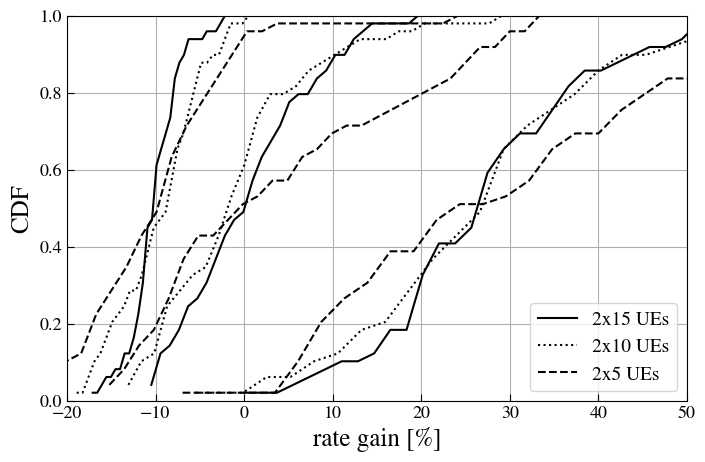

In [80]:
cdf(gain_load_100,'2x15 UEs','black',gain_load_100_10,'2x10 UEs','black',gain_load_100_5,'2x5 UEs','black',gain_load_150,'','black',gain_load_150_10,'','black',gain_load_150_5,'','black',gain_load_200,'','black',gain_load_200_10,'','black',gain_load_200_5,'','black','',np.min(gain_load_100),np.max(gain_load_200),'rate gain [%]',30)
#gain_load_150,'150% load 15 UEs','silver',gain_load_150_10,'150% load 10 UEs','silver',gain_load_150_5,'150% load 5 UEs','silver',


### Auswertungen SINR

In [81]:
df3=pd.read_csv('data_frame_scenario_sinrcluster')

In [82]:
df3['SINR [dB]']=np.round(df3['SINR [dB]']*2)/2

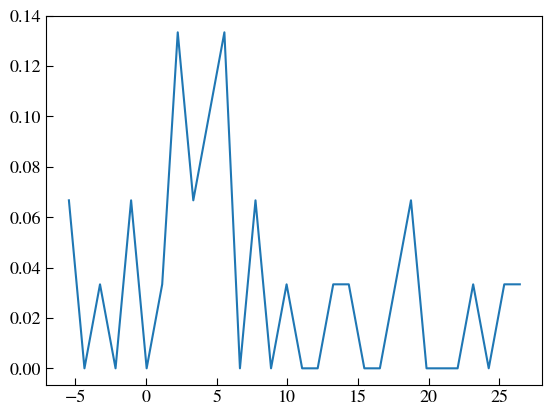

In [83]:
heights,bins = np.histogram(df3['SINR [dB]'],bins=30)

# Normalize
heights = heights/float(sum(heights))
binMids=bins[:-1]+np.diff(bins)/2.
plt.plot(binMids,heights)

no JT
10% Quantil: -1.1999999999999993
90% Quantil: 19.400000000000006
50% Quantil (Median): 4.5
sinr with JT
10% Quantil: 7.300485862249273
90% Quantil: 27.378941126862372
50% Quantil (Median): 14.98781175164298
sinr with JT cluster
10% Quantil: 2.1558893073495216
90% Quantil: 25.630959788840954
50% Quantil (Median): 12.940139652124689


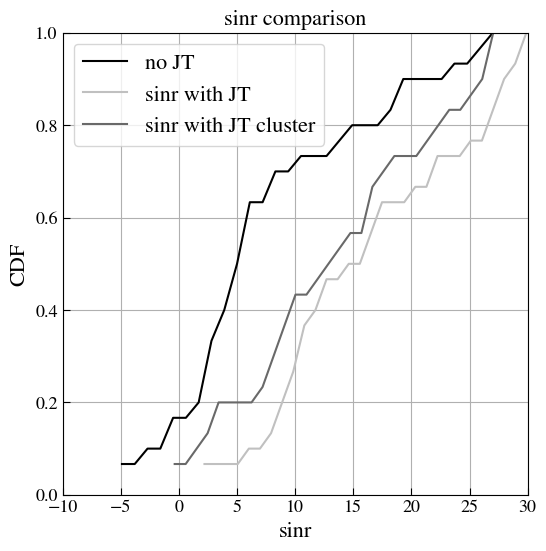

In [84]:
sh.cdf_3(df3['SINR [dB]'],'no JT','black',df3['SINR-CoMP [dB]'],'sinr with JT','silver',df3['SINR cluster [dB]'],'sinr with JT cluster','dimgrey','sinr comparison',-10,30,'sinr',30)

In [101]:
def cdf_3(data,legende1,color1,data2,legende2,color2,data3,legende3,color3,titel,xbereich1,xbereich2,xachse,bins):
    
    count, bins_count = np.histogram(data, bins)
    count2, bins_count2 = np.histogram(data2, bins)
    count3, bins_count3 = np.histogram(data3, bins)
    pdf = count / sum(count)
    pdf2 = count2 / sum(count2)
    pdf3 = count3 / sum(count3)
    cdf = np.cumsum(pdf)
    cdf2 = np.cumsum(pdf2)
    cdf3 = np.cumsum(pdf3)

    # plotting PDF and CDF
    #f = plt.figure()
    #f.set_figwidth(6)
    #f.set_figheight(4)
        # plotting PDF and CDF
    f = plt.figure()
    f.set_figwidth(8)
    f.set_figheight(5)

    parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
    plt.rcParams.update(parameters)
    
    plt.plot(bins_count[1:], cdf, color=color1, label=legende1)
    plt.plot(bins_count2[1:], cdf2, color=color2,linestyle='dotted', label=legende2)
    plt.plot(bins_count3[1:], cdf3, color=color3, label=legende3, linewidth=3)
    
    
    plt.title(titel)
    
    plt.legend(fontsize=16)
    plt.grid()
    plt.ylim([0,1])
    plt.xlim([xbereich1,xbereich2])
    plt.xlabel(xachse,fontsize=18)
    plt.ylabel('CDF',fontsize=18)
    
    print(legende1)
    print('10% Quantil:', np.percentile(data, 10)) 
    print('90% Quantil:', np.percentile(data, 90)) 
    print('50% Quantil (Median):', np.percentile(data, 50)) 
    print(legende2)
    print('10% Quantil:', np.percentile(data2, 10)) 
    print('90% Quantil:', np.percentile(data2, 90)) 
    print('50% Quantil (Median):', np.percentile(data2, 50))
    print(legende3)
    print('10% Quantil:', np.percentile(data3, 10)) 
    print('90% Quantil:', np.percentile(data3, 90)) 
    print('50% Quantil (Median):', np.percentile(data3, 50))

$\gamma_{s}$
10% Quantil: -1.1999999999999993
90% Quantil: 19.400000000000006
50% Quantil (Median): 4.5
$\gamma_{m}$
10% Quantil: 2.1558893073495216
90% Quantil: 25.630959788840954
50% Quantil (Median): 12.940139652124689
$ \gamma_{m}$ / $\gamma_{s}$
10% Quantil: 0.3197258199189656
90% Quantil: 11.258128607367787
50% Quantil (Median): 5.546958559357481


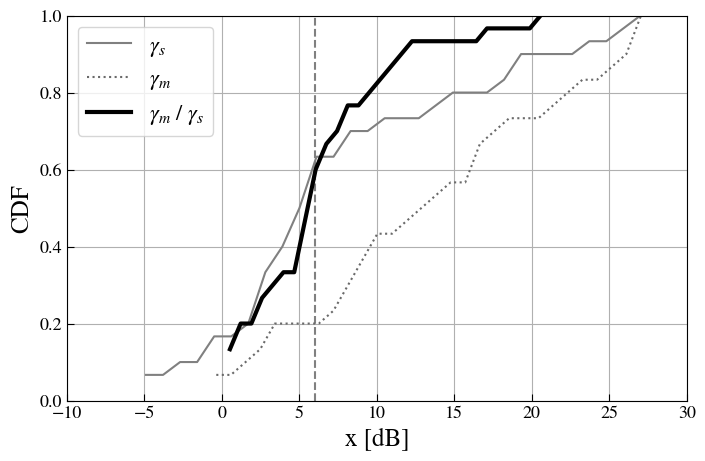

In [104]:
cdf_3(df3['SINR [dB]'],'$\gamma_{s}$','grey',df3['SINR cluster [dB]'],'$\gamma_{m}$','dimgrey',df3['SINR cluster [dB]']-df3['SINR [dB]'],'$ \gamma_{m}$ / $\gamma_{s}$','black','',-10,30,'x [dB]',30)

plt.vlines(x=6,ymin=0, ymax=1,ls='-',label='comp threshold',colors='gray',linestyle='--')
#plt.hlines(y=0.6,xmin=-10, xmax=6,ls='-',label='comp threshold',colors='gray',linestyle='--')
#xtick(6,0)


In [105]:
print(plt.rcParams['font.family'])

['STIXGeneral']


No handles with labels found to put in legend.


10% Quantil: 0.3197258199189656
90% Quantil: 11.258128607367787
50% Quantil (Median): 5.546958559357481


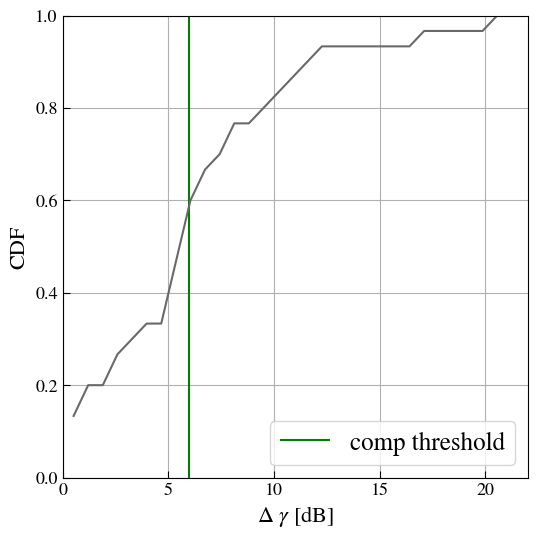

In [87]:
sh.cdf_1(df3['SINR cluster [dB]']-df3['SINR [dB]'],'','dimgrey','',0,22,'$\Delta$ $\gamma$ [dB]',30)
plt.vlines(x=6,ymin=0, ymax=1,ls='-',label='comp threshold',colors='green')
plt.legend(loc='lower right')
